# Trabajo Fin de Máster

### Beatriz Reca Corpas

##### Según la Organización Mundial de la Salud (OMS) las enfermedades cardiovasculares son un conjunto de trastornos del corazón y de los vasos sanguíneos. Las enfermedades cardiovasculares son la principal causa de defunción en todo el mundo.  Se estima que solo en 2012 murieron más de 17,5 millones de personas, representando así el 30% de las defunciones registradas en el mundo. De aquí al 2030, se estima que casi 23,6 millones de personas morirán por alguna enfermedad cardiovascular. Por lo que seguirá siendo la principal causa de muerte.
##### Por todo ello, el objetivo de esta práctica es predecir las personas que tienen una probabilidad más alta de fallecer. Para poder predecir esto, contaremos con variables que nos indicarán el estado en el que se encuentra su enfermedad.


##### La base de datos principal que vamos a utilizar es Heart.csv. Esta base de datos ha sido extraída de la librería sashelp del software estadístico SAS (Statistical Analysis System).  Además de las variables de las que disponemos en nuestro conjunto de datos, hay otras que podrían ser relevantes en la predicción. Por ello, añadimos tres bases de datos, una con información del porcentaje de personas que realizan actividad física por edad y otra por sexo (dos conjuntos de datos diferenciados, ya que no tenemos la información de sexo y edad juntos), ya que la actividad física es un factor muy importante en las enfermedades. Estos datos se han extraído del INE (Instituto Nacional de Estadística):

##### https://www.ine.es/ss/SatelliteL=es_ES&c=INESeccion_C&cid=1259944495973&p=1254735110672&pagename=ProductosYServicios%2FPYSLayou&param1=PYSDetalleFichaIndicador&param3=1259947308577

##### Y otra base de datos en la que se indica las muertes atribuibles al consumo de tabaco, por cada tipo de enfermedad que tenemos en nuestra base de datos principal. Estos datos han sido extraídos del Ministerio de Sanidad.

##### https://www.mscbs.gob.es/estadEstudios/estadisticas/estadisticas/estMinisterio/mortalidad/docs/MuertesTabacoEspana2014.pdf

##### En esta práctica uniremos y limpiaremos nuestro conjunto de datos, preparandolo así para poder realizar modelos análiticos, los cuales nos proporcionen información de utilidad.

In [14]:
# Importamos los paquetes necesarios
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


Lo primero que realizamos es la importación de nuestros conjuntos de datos.En este caso tenemos 4 conjuntos de datos para cargar

In [15]:

heart = pd.read_csv('heart.csv',sep=';')
actividadfisica_sexo= pd.read_csv('Actividad_Fisica_por_Sexo.csv',sep=';')
actividadfisica_edad= pd.read_csv('Datos_ActividadFisica.csv',sep=';')
muertes_tabaco= pd.read_csv('muertestabaco_por_enfermedad.csv',sep=';')


Una vez que se cargan los datos, y se eliminan los posibles dublicados que puedan tener ( en este caso no encontramos duplicados), realizamos el cruce de estos para tener nuestra BBDD completa y empezar a realizar la limpieza de datos.

In [16]:
heart_m1=heart.merge(muertes_tabaco, on='DeathCause', how='left')

In [17]:
heart_m2=heart_m1.merge(actividadfisica_sexo, on='Sex', how='left')

In [18]:
heart_tot=heart_m2.merge(actividadfisica_edad, on='AgeAtStart', how='left')


In [19]:
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status,Muertes_por_tabaco,Ejercicio Regular_Sexo,Sedentarismo_Sexo,Ejercicio_Regular_edad,Sedentarismo_edad
0,Dead,Other,NaN,Female,29,62.50,140.0,78,124,121.0,...,NaN,NaN,Normal,Overweight,Non-smoker,6.4,20.4,41.9,38.3,34.6
1,Dead,Cancer,NaN,Female,41,59.75,194.0,92,144,183.0,...,181.0,Desirable,High,Overweight,Non-smoker,16.8,20.4,41.9,29.2,38.4
2,Alive,NaN,NaN,Female,57,62.25,132.0,90,170,114.0,...,250.0,High,High,Overweight,Moderate (6-15),NaN,20.4,41.9,20.3,36.4
3,Alive,NaN,NaN,Female,39,65.75,158.0,80,128,123.0,...,242.0,High,Normal,Overweight,Non-smoker,NaN,20.4,41.9,29.2,38.4
4,Alive,NaN,NaN,Male,42,66.00,156.0,76,110,116.0,...,281.0,High,Optimal,Overweight,Heavy (16-25),NaN,31.6,33.5,29.2,38.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,228.0,Borderline,Normal,Overweight,Heavy (16-25),12.5,31.6,33.5,29.2,38.4
5205,Alive,NaN,NaN,Female,42,60.00,141.0,76,124,129.0,...,209.0,Borderline,Normal,Overweight,Light (1-5),NaN,20.4,41.9,29.2,38.4
5206,Alive,NaN,NaN,Female,51,58.25,123.0,90,152,119.0,...,197.0,Desirable,High,Overweight,Light (1-5),NaN,20.4,41.9,20.3,36.4
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,238.0,Borderline,Optimal,Overweight,Very Heavy (> 25),12.5,31.6,33.5,29.2,38.4


In [ ]:
#heart=heart.drop_duplicates()
#actividadfisica_sexo=actividadfisica_sexo.drop_duplicates()
#actividadfisica_edad=actividadfisica_edad.drop_duplicates()
#muertes_tabaco=muertes_tabaco.drop_duplicates()

Antes de realizar la unión de nuestros conjuntos de datos, eliminamos los duplicados que pueda haber

In [8]:
heart_tot=heart_tot.drop_duplicates()
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status,Muertes_por_tabaco,Ejercicio Regular_Sexo,Sedentarismo_Sexo,Ejercicio_Regular_edad,Sedentarismo_edad
0,Dead,Other,NaN,Female,29,62.50,140.0,78,124,121.0,...,NaN,NaN,Normal,Overweight,Non-smoker,6.4,20.4,41.9,38.3,34.6
1,Dead,Cancer,NaN,Female,41,59.75,194.0,92,144,183.0,...,181.0,Desirable,High,Overweight,Non-smoker,16.8,20.4,41.9,29.2,38.4
2,Alive,NaN,NaN,Female,57,62.25,132.0,90,170,114.0,...,250.0,High,High,Overweight,Moderate (6-15),NaN,20.4,41.9,20.3,36.4
3,Alive,NaN,NaN,Female,39,65.75,158.0,80,128,123.0,...,242.0,High,Normal,Overweight,Non-smoker,NaN,20.4,41.9,29.2,38.4
4,Alive,NaN,NaN,Male,42,66.00,156.0,76,110,116.0,...,281.0,High,Optimal,Overweight,Heavy (16-25),NaN,31.6,33.5,29.2,38.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,228.0,Borderline,Normal,Overweight,Heavy (16-25),12.5,31.6,33.5,29.2,38.4
5205,Alive,NaN,NaN,Female,42,60.00,141.0,76,124,129.0,...,209.0,Borderline,Normal,Overweight,Light (1-5),NaN,20.4,41.9,29.2,38.4
5206,Alive,NaN,NaN,Female,51,58.25,123.0,90,152,119.0,...,197.0,Desirable,High,Overweight,Light (1-5),NaN,20.4,41.9,20.3,36.4
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,238.0,Borderline,Optimal,Overweight,Very Heavy (> 25),12.5,31.6,33.5,29.2,38.4


In [ ]:
#heart=heart.drop_duplicates()
#actividadfisica_sexo=actividadfisica_sexo.drop_duplicates()
#actividadfisica_edad=actividadfisica_edad.drop_duplicates()
#muertes_tabaco=muertes_tabaco.drop_duplicates()

Comprobamos como es nuestra base de datos, para ello veremos el número de elementos no nulos que tiene cada variable y de que tipo son.
Calcularemos también algunos estadisticos del dataset.

In [7]:
#Con ello podemos ver cada una de las variables de nuestro conjunto de datos y el número de elementos no nulos que
# tiene cada variable. También nos da información del tipo de variables que tenemos en el dataset

heart_tot.info()

# Como vemos tenemos: float64(7), int64(3), object(12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5209 entries, 0 to 5208
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Status                  5209 non-null   object 
 1   DeathCause              1991 non-null   object 
 2   AgeCHDdiag              1449 non-null   float64
 3   Sex                     5209 non-null   object 
 4   AgeAtStart              5209 non-null   int64  
 5   Height                  5203 non-null   float64
 6   Weight                  5203 non-null   float64
 7   Diastolic               5209 non-null   int64  
 8   Systolic                5209 non-null   int64  
 9   MRW                     5203 non-null   float64
 10  Smoking                 5173 non-null   float64
 11  AgeAtDeath              1991 non-null   float64
 12  Cholesterol             5057 non-null   float64
 13  Chol_Status             5057 non-null   object 
 14  BP_Status               5209 non-null   

De las variables numéricas podemos ver algunos estadísticos, por lo que esto nos ayuda a visualizar como serán nuestros datos y si nos encontraremos valores atipicos. 

Vemos ahora las variables numéricas que tenemos en nuestro conjunto de datos.

In [8]:
# Comprobamos las variables numéricas

heart_tot_numeric = heart_tot.select_dtypes(include=[np.number])
numeric_cols = heart_tot_numeric.columns.values
print(numeric_cols)

['AgeCHDdiag' 'AgeAtStart' 'Height' 'Weight' 'Diastolic' 'Systolic' 'MRW'
 'Smoking' 'AgeAtDeath' 'Cholesterol' 'Muertes_por_tabaco'
 'Ejercicio Regular_Sexo' 'Sedentarismo_Sexo' 'Ejercicio_Regular_edad'
 'Sedentarismo_edad']


In [9]:
heart_tot.describe()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Muertes_por_tabaco,Ejercicio Regular_Sexo,Sedentarismo_Sexo,Ejercicio_Regular_edad,Sedentarismo_edad
count,1449.000000,5209.000000,5203.000000,5203.000000,5209.000000,5209.000000,5203.000000,5173.000000,1991.000000,5057.000000,1991.000000,5209.000000,5209.000000,5209.000000,5209.000000
mean,63.302968,44.068727,64.813185,153.086681,85.358610,136.909580,119.957525,9.366518,70.536414,227.417441,10.497388,25.422691,38.132981,27.966577,37.169054
std,10.018215,8.574954,3.582707,28.915426,12.973091,23.739596,19.983401,12.031451,10.559406,44.935524,5.013998,5.570698,4.178023,6.015964,1.436386
min,32.000000,28.000000,51.500000,67.000000,50.000000,82.000000,67.000000,0.000000,36.000000,96.000000,4.000000,20.400000,33.500000,20.300000,34.600000
25%,57.000000,37.000000,62.250000,132.000000,76.000000,120.000000,106.000000,0.000000,63.000000,196.000000,6.400000,20.400000,33.500000,20.300000,36.400000
50%,63.000000,43.000000,64.500000,150.000000,84.000000,132.000000,118.000000,1.000000,71.000000,223.000000,12.500000,20.400000,41.900000,29.200000,38.400000
75%,70.000000,51.000000,67.500000,172.000000,92.000000,148.000000,131.000000,20.000000,79.000000,255.000000,16.800000,31.600000,41.900000,29.200000,38.400000
max,90.000000,62.000000,76.500000,300.000000,160.000000,300.000000,268.000000,60.000000,93.000000,568.000000,16.800000,31.600000,41.900000,38.300000,38.400000


Vemos ahora las variables alfanuméricas que tenemos en nuestro conjunto de datos.

In [10]:
# Comprobamos las variables alfanuméricas

heart_tot_non_numeric = heart_tot.select_dtypes(exclude=[np.number])
non_numeric_cols = heart_tot_non_numeric.columns.values
print(non_numeric_cols)

['Status' 'DeathCause' 'Sex' 'Chol_Status' 'BP_Status' 'Weight_Status'
 'Smoking_Status']


Vemos que nuestro conjunto de datos tiene 5209 filas y 22 variables. Con esto hemos podido visualizar y profundizar en qué tipo de datos tenemos en nuestro conjunto de datos.

A continuación, veremos la relación de correlación entre nuestras variables, debido a que necesitamos saber si las variables están correlacionadas para eliminarlas. Si encontramos una correlación superior al 0,9 eliminaremos estas variables.

In [11]:
heart_tot.corr()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Muertes_por_tabaco,Ejercicio Regular_Sexo,Sedentarismo_Sexo,Ejercicio_Regular_edad,Sedentarismo_edad
AgeCHDdiag,1.000000,0.550909,-0.210416,-0.137415,-0.035105,0.069241,0.006422,-0.283567,0.748112,0.003629,-0.052983,-0.201369,0.201369,-0.501014,-0.065569
AgeAtStart,0.550909,1.000000,-0.131733,0.093519,0.275401,0.379379,0.204515,-0.167431,0.688605,0.273415,-0.132480,0.002226,-0.002226,-0.897403,0.062411
Height,-0.210416,-0.131733,1.000000,0.517385,-0.014245,-0.071127,-0.136289,0.287032,-0.136575,-0.079587,0.098911,0.693441,-0.693441,0.116439,-0.029326
Weight,-0.137415,0.093519,0.517385,1.000000,0.327568,0.263584,0.767171,0.088703,0.004604,0.072428,0.023271,0.448580,-0.448580,-0.091806,0.004732
Diastolic,-0.035105,0.275401,-0.014245,0.327568,1.000000,0.796061,0.385110,-0.064121,0.010039,0.183364,-0.110470,0.060892,-0.060892,-0.249177,0.043117
Systolic,0.069241,0.379379,-0.071127,0.263584,0.796061,1.000000,0.362574,-0.092378,0.102174,0.199350,-0.141304,0.001093,-0.001093,-0.334484,-0.011053
MRW,0.006422,0.204515,-0.136289,0.767171,0.385110,0.362574,1.000000,-0.125237,0.102925,0.137355,-0.039008,-0.045156,0.045156,-0.190595,0.024924
Smoking,-0.283567,-0.167431,0.287032,0.088703,-0.064121,-0.092378,-0.125237,1.000000,-0.285249,-0.011780,0.052487,0.365424,-0.365424,0.135822,0.026047
AgeAtDeath,0.748112,0.688605,-0.136575,0.004604,0.010039,0.102174,0.102925,-0.285249,1.000000,0.078444,-0.111868,-0.088305,0.088305,-0.614706,-0.235955
Cholesterol,0.003629,0.273415,-0.079587,0.072428,0.183364,0.199350,0.137355,-0.011780,0.078444,1.000000,-0.018237,-0.027584,0.027584,-0.246353,0.042952


<AxesSubplot:>

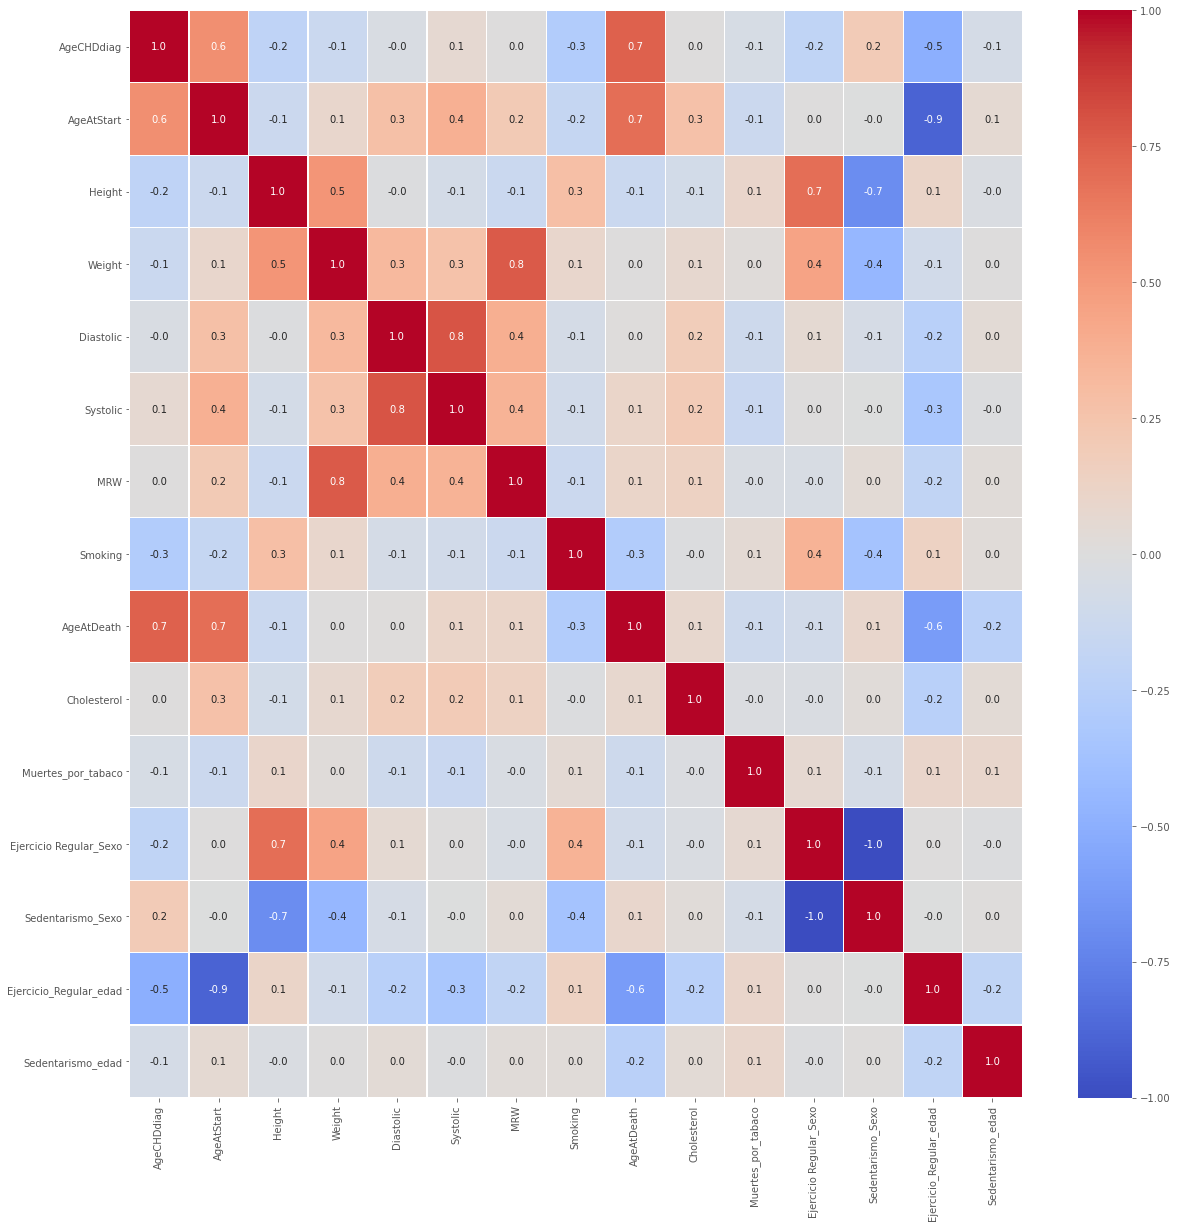

In [12]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(heart_tot.corr(), annot=True, linewidths=.18, fmt= '.1f',cmap= 'coolwarm', ax=ax)

Como vemos, tenemos algunos 0.8, por lo que estas variables estarán correlacionadas. En este dataset tiene sentido que algunas variables esten correlacionadas, por ejemplo si tu peso es superior, el cálculo del MRW también lo será. Pero no eliminaremos ninguna variable por el momento.

## A continuación empezamos a realizar la limpieza de los datos.

### Missing Data Heatmap

<AxesSubplot:>

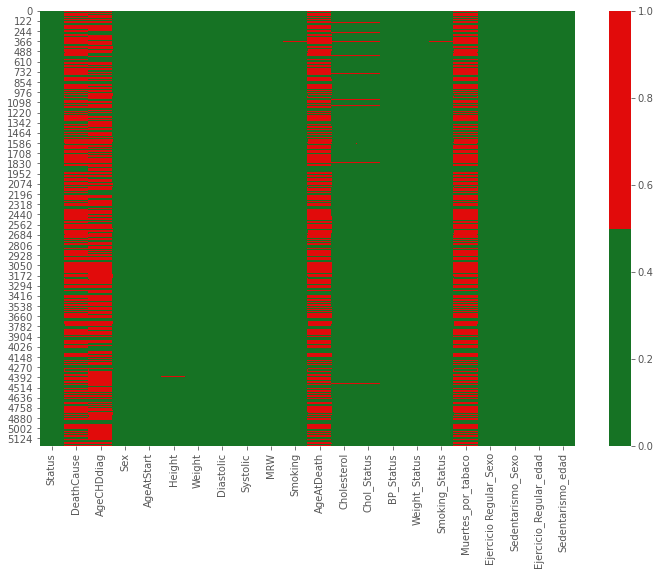

In [13]:
cols = heart_tot.columns[:30] # first 30 columns
colours = ['#167324', '#E10B0B'] # specify the colours 
sns.heatmap(heart_tot[cols].isnull(), cmap=sns.color_palette(colours))


Se muestran los patrones de datos que faltan de las primeras 30 variables, en este caso, tenemos menos variables de 30.
El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color rojo representa los datos que faltan, mientras que el color verde, el caso contrario.


## Missing Data Percentage List

Realizamos una lista de los missing que tiene cada una de las variables 

In [14]:
for col in heart_tot.columns:
    pct_missing = np.mean(heart_tot[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Status - 0%
DeathCause - 62%
AgeCHDdiag - 72%
Sex - 0%
AgeAtStart - 0%
Height - 0%
Weight - 0%
Diastolic - 0%
Systolic - 0%
MRW - 0%
Smoking - 1%
AgeAtDeath - 62%
Cholesterol - 3%
Chol_Status - 3%
BP_Status - 0%
Weight_Status - 0%
Smoking_Status - 1%
Muertes_por_tabaco - 62%
Ejercicio Regular_Sexo - 0%
Sedentarismo_Sexo - 0%
Ejercicio_Regular_edad - 0%
Sedentarismo_edad - 0%


In [15]:
for col in heart_tot.columns:
    pct_missing = np.mean(heart_tot[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

Status - 0.0%
DeathCause - 61.77769245536572%
AgeCHDdiag - 72.18276060664235%
Sex - 0.0%
AgeAtStart - 0.0%
Height - 0.11518525628719525%
Weight - 0.11518525628719525%
Diastolic - 0.0%
Systolic - 0.0%
MRW - 0.11518525628719525%
Smoking - 0.6911115377231715%
AgeAtDeath - 61.77769245536572%
Cholesterol - 2.918026492608946%
Chol_Status - 2.918026492608946%
BP_Status - 0.0%
Weight_Status - 0.11518525628719525%
Smoking_Status - 0.6911115377231715%
Muertes_por_tabaco - 61.77769245536572%
Ejercicio Regular_Sexo - 0.0%
Sedentarismo_Sexo - 0.0%
Ejercicio_Regular_edad - 0.0%
Sedentarismo_edad - 0.0%


Como vemos las variables con un % más alto de missing son: DeathCause , AgeCHDdiag, AgeAtDeath y Muertes_por_tabaco.

In [16]:
heart_tot.isnull().sum()

Status                       0
DeathCause                3218
AgeCHDdiag                3760
Sex                          0
AgeAtStart                   0
Height                       6
Weight                       6
Diastolic                    0
Systolic                     0
MRW                          6
Smoking                     36
AgeAtDeath                3218
Cholesterol                152
Chol_Status                152
BP_Status                    0
Weight_Status                6
Smoking_Status              36
Muertes_por_tabaco        3218
Ejercicio Regular_Sexo       0
Sedentarismo_Sexo            0
Ejercicio_Regular_edad       0
Sedentarismo_edad            0
dtype: int64

Status - 0%
DeathCause - 62%
AgeCHDdiag - 72%
Sex - 0%
AgeAtStart - 0%
Height - 0%
Weight - 0%
Diastolic - 0%
Systolic - 0%
MRW - 0%
Smoking - 1%
AgeAtDeath - 62%
Cholesterol - 3%
Chol_Status - 3%
BP_Status - 0%
Weight_Status - 0%
Smoking_Status - 1%
Muertes_por_tabaco - 62%
Ejercicio Regular_Sexo - 0%
Sedentarismo_Sexo - 0%
Ejercicio_Regular_edad - 0%
Sedentarismo_edad - 0%


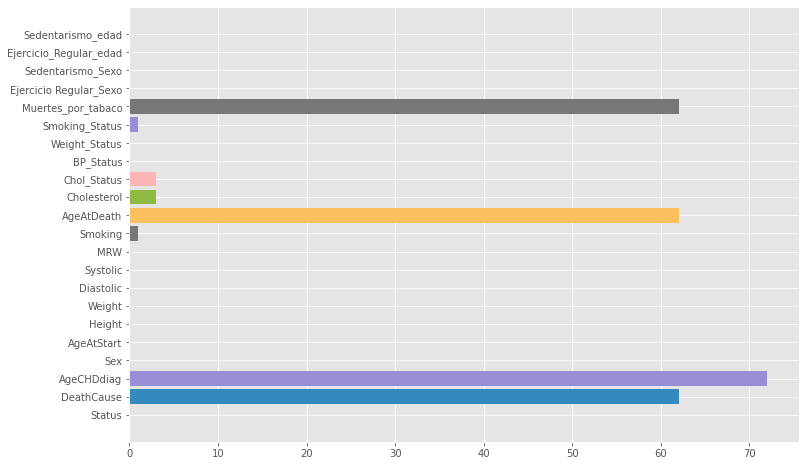

In [17]:
for col in heart_tot.columns:
    pct_missing = np.mean(heart_tot[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

## Missing Data Histogram

Otra forma de visualizar los missing es a partir de un histograma.

created missing indicator for: DeathCause
created missing indicator for: AgeCHDdiag
created missing indicator for: Height
created missing indicator for: Weight
created missing indicator for: MRW
created missing indicator for: Smoking
created missing indicator for: AgeAtDeath
created missing indicator for: Cholesterol
created missing indicator for: Chol_Status
created missing indicator for: Weight_Status
created missing indicator for: Smoking_Status
created missing indicator for: Muertes_por_tabaco


<AxesSubplot:xlabel='index'>

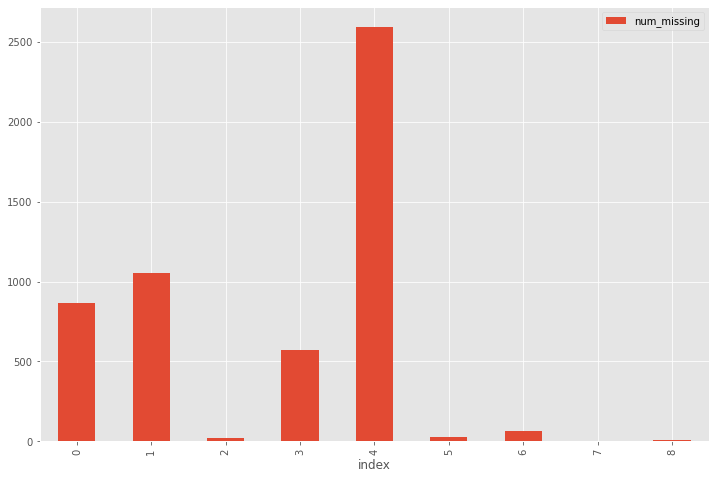

In [18]:
# first create missing indicator for features with missing data
for col in heart_tot.columns:
    missing = heart_tot[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        heart_tot['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in heart_tot.columns if 'ismissing' in col]
heart_tot['num_missing'] = heart_tot[ismissing_cols].sum(axis=1)

heart_tot['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Una vez que hemos visualizados los missing ( valores faltantes) de nuestra base de datos, procedemos a imputar los valores desaparecidos.
Debemos imputarlos en las variables que consideremos que son importantes para el análisis.
En este caso, consideramos que todas las variables que tienen missing deben de ser imputadas.

Tenemos dos razones:

    1) El % de missing es muy pequeño, por lo que la variable nos da información relevante.

    2) El % de missing es elevado, pero tiene sentido que aparezcan a vacio ( por ejemplo, si una persona no fallece, no puede tener informada la edad de fallecimiento)

##### DeathCause

Lo primero que vamos a hacer es tratar la variable DeathCause, en esta variable tenemos un 62% de valores vacios , y tiene sentido ya que los pacientes que no mueren no tienen informada está vairble, por lo que querremos modificar los valores nulos por "non-fatal heart disease"

In [19]:

# Modificación en nuestro conjuntos de datos de la variable DeathCause.

heart_tot['DeathCause']=heart_tot['DeathCause'].fillna(0)
heart_tot['DeathCause']=heart_tot['DeathCause'].replace(0,"Non-fatal heart disease")
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Weight_ismissing,MRW_ismissing,Smoking_ismissing,AgeAtDeath_ismissing,Cholesterol_ismissing,Chol_Status_ismissing,Weight_Status_ismissing,Smoking_Status_ismissing,Muertes_por_tabaco_ismissing,num_missing
0,Dead,Other,NaN,Female,29,62.50,140.0,78,124,121.0,...,False,False,False,False,True,True,False,False,False,3
1,Dead,Cancer,NaN,Female,41,59.75,194.0,92,144,183.0,...,False,False,False,False,False,False,False,False,False,1
2,Alive,Non-fatal heart disease,NaN,Female,57,62.25,132.0,90,170,114.0,...,False,False,False,True,False,False,False,False,True,4
3,Alive,Non-fatal heart disease,NaN,Female,39,65.75,158.0,80,128,123.0,...,False,False,False,True,False,False,False,False,True,4
4,Alive,Non-fatal heart disease,NaN,Male,42,66.00,156.0,76,110,116.0,...,False,False,False,True,False,False,False,False,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,False,False,False,False,False,False,False,False,False,0
5205,Alive,Non-fatal heart disease,NaN,Female,42,60.00,141.0,76,124,129.0,...,False,False,False,True,False,False,False,False,True,4
5206,Alive,Non-fatal heart disease,NaN,Female,51,58.25,123.0,90,152,119.0,...,False,False,False,True,False,False,False,False,True,4
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,False,False,False,False,False,False,False,False,False,0


In [20]:
heart_tot['DeathCause'].value_counts()

Non-fatal heart disease      3218
Coronary Heart Disease        605
Cancer                        539
Cerebral Vascular Disease     378
Other                         357
Unknown                       112
Name: DeathCause, dtype: int64

##### AgeAtDeath

Una variable muy relacionada con DeathCause es AgeAtDeath , ya que también aparece vacía cuando el paciente no fallece por la enfermedad cardiaca que padece. Por lo que la trataremos a continuación, esta variable al ser numérica pondremos estos valores nulos como 0 ( una valor no posible para una edad) así mantendremos la información pero seremos capaces de identificarlos

In [21]:
heart_tot['AgeAtDeath']=heart_tot['AgeAtDeath'].fillna(0)


##### Muertes_por_tabaco

La primera variable que tratamos es Muertes_por_tabaco, como está variable está relacionada con la variable de causa de la muerte y no tenemos causa de muerte, ya que esos pacientes no mueren, introduciremos el % de cuando la enfermedad es otras, ya que no tenemos idfentidicado que enfermedad padecen, solo sabemos que la enfermedad que padecen es del corazón, pero no han fallecido.


In [22]:

heart_tot['Muertes_por_tabaco']=heart_tot['Muertes_por_tabaco'].fillna(0)
heart_tot['Muertes_por_tabaco']=heart_tot['Muertes_por_tabaco'].replace(0,6.4)


##### Variable numéricas

A continuación tratamos todas las variables numéricas que tienen algún missing , imputandole la mediana.

In [23]:

heart_tot_numeric = heart_tot.select_dtypes(include=[np.number])
numeric_cols = heart_tot_numeric.columns.values

for col in numeric_cols:
    missing = heart_tot[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        print('imputing missing values for: {}'.format(col))
        heart_tot['{}_ismissing'.format(col)] = missing
        med = heart_tot[col].median()
        heart_tot[col] = heart_tot[col].fillna(med)


imputing missing values for: AgeCHDdiag
imputing missing values for: Height
imputing missing values for: Weight
imputing missing values for: MRW
imputing missing values for: Smoking
imputing missing values for: Cholesterol


In [24]:
heart_tot['Smoking'].value_counts()

0.0     2501
20.0     921
5.0      466
15.0     321
10.0     255
30.0     215
40.0     151
1.0      149
25.0     125
35.0      49
50.0      26
60.0      15
45.0      13
55.0       2
Name: Smoking, dtype: int64

In [25]:
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Weight_ismissing,MRW_ismissing,Smoking_ismissing,AgeAtDeath_ismissing,Cholesterol_ismissing,Chol_Status_ismissing,Weight_Status_ismissing,Smoking_Status_ismissing,Muertes_por_tabaco_ismissing,num_missing
0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,121.0,...,False,False,False,False,True,True,False,False,False,3
1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,183.0,...,False,False,False,False,False,False,False,False,False,1
2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,114.0,...,False,False,False,True,False,False,False,False,True,4
3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,123.0,...,False,False,False,True,False,False,False,False,True,4
4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,116.0,...,False,False,False,True,False,False,False,False,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,False,False,False,False,False,False,False,False,False,0
5205,Alive,Non-fatal heart disease,63.0,Female,42,60.00,141.0,76,124,129.0,...,False,False,False,True,False,False,False,False,True,4
5206,Alive,Non-fatal heart disease,63.0,Female,51,58.25,123.0,90,152,119.0,...,False,False,False,True,False,False,False,False,True,4
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,False,False,False,False,False,False,False,False,False,0


Trataremos ahora las variables alfanuméricas que tienen algún valor a missing.

##### Variable alfanuméricas

El resto de variables alfanuméricas se tratan todas a la vez, imputandolas por el valor más frecuente.

In [26]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
heart_tot_non_numeric = heart_tot.select_dtypes(exclude=[np.number])
non_numeric_cols = heart_tot_non_numeric.columns.values

for col in non_numeric_cols:
    missing = heart_tot[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        heart_tot['{}_ismissing'.format(col)] = missing
        
        top = heart_tot[col].describe()['top'] # impute with the most frequent value.
        heart_tot[col] = heart_tot[col].fillna(top)

imputing missing values for: Chol_Status
imputing missing values for: Weight_Status
imputing missing values for: Smoking_Status


Vemos que una vez imputados los missing nuestro conjunto de datos, tendría un 0% de missing en todas las variables.

In [27]:
for col in heart_tot.columns:
    pct_missing = np.mean(heart_tot[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Status - 0%
DeathCause - 0%
AgeCHDdiag - 0%
Sex - 0%
AgeAtStart - 0%
Height - 0%
Weight - 0%
Diastolic - 0%
Systolic - 0%
MRW - 0%
Smoking - 0%
AgeAtDeath - 0%
Cholesterol - 0%
Chol_Status - 0%
BP_Status - 0%
Weight_Status - 0%
Smoking_Status - 0%
Muertes_por_tabaco - 0%
Ejercicio Regular_Sexo - 0%
Sedentarismo_Sexo - 0%
Ejercicio_Regular_edad - 0%
Sedentarismo_edad - 0%
DeathCause_ismissing - 0%
AgeCHDdiag_ismissing - 0%
Height_ismissing - 0%
Weight_ismissing - 0%
MRW_ismissing - 0%
Smoking_ismissing - 0%
AgeAtDeath_ismissing - 0%
Cholesterol_ismissing - 0%
Chol_Status_ismissing - 0%
Weight_Status_ismissing - 0%
Smoking_Status_ismissing - 0%
Muertes_por_tabaco_ismissing - 0%
num_missing - 0%


Status - 0%
DeathCause - 0%
AgeCHDdiag - 0%
Sex - 0%
AgeAtStart - 0%
Height - 0%
Weight - 0%
Diastolic - 0%
Systolic - 0%
MRW - 0%
Smoking - 0%
AgeAtDeath - 0%
Cholesterol - 0%
Chol_Status - 0%
BP_Status - 0%
Weight_Status - 0%
Smoking_Status - 0%
Muertes_por_tabaco - 0%
Ejercicio Regular_Sexo - 0%
Sedentarismo_Sexo - 0%
Ejercicio_Regular_edad - 0%
Sedentarismo_edad - 0%
DeathCause_ismissing - 0%
AgeCHDdiag_ismissing - 0%
Height_ismissing - 0%
Weight_ismissing - 0%
MRW_ismissing - 0%
Smoking_ismissing - 0%
AgeAtDeath_ismissing - 0%
Cholesterol_ismissing - 0%
Chol_Status_ismissing - 0%
Weight_Status_ismissing - 0%
Smoking_Status_ismissing - 0%
Muertes_por_tabaco_ismissing - 0%
num_missing - 0%


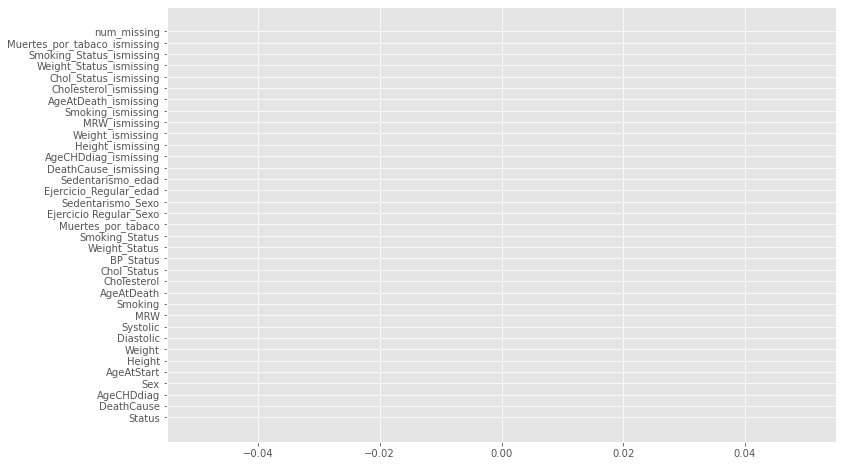

In [28]:
for col in heart_tot.columns:
    pct_missing = np.mean(heart_tot[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

In [29]:
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Weight_ismissing,MRW_ismissing,Smoking_ismissing,AgeAtDeath_ismissing,Cholesterol_ismissing,Chol_Status_ismissing,Weight_Status_ismissing,Smoking_Status_ismissing,Muertes_por_tabaco_ismissing,num_missing
0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,121.0,...,False,False,False,False,True,True,False,False,False,3
1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,183.0,...,False,False,False,False,False,False,False,False,False,1
2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,114.0,...,False,False,False,True,False,False,False,False,True,4
3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,123.0,...,False,False,False,True,False,False,False,False,True,4
4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,116.0,...,False,False,False,True,False,False,False,False,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,False,False,False,False,False,False,False,False,False,0
5205,Alive,Non-fatal heart disease,63.0,Female,42,60.00,141.0,76,124,129.0,...,False,False,False,True,False,False,False,False,True,4
5206,Alive,Non-fatal heart disease,63.0,Female,51,58.25,123.0,90,152,119.0,...,False,False,False,True,False,False,False,False,True,4
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,False,False,False,False,False,False,False,False,False,0


Una vez que se ha realizado el tratamiento e imputación de missing en las variables correspondientes, ya tenemos nuestro conjunto de datos sin missing.
A continuación miramos los outliers que puede tener nuestro conjunto de datos.

### Correlaciones

<AxesSubplot:>

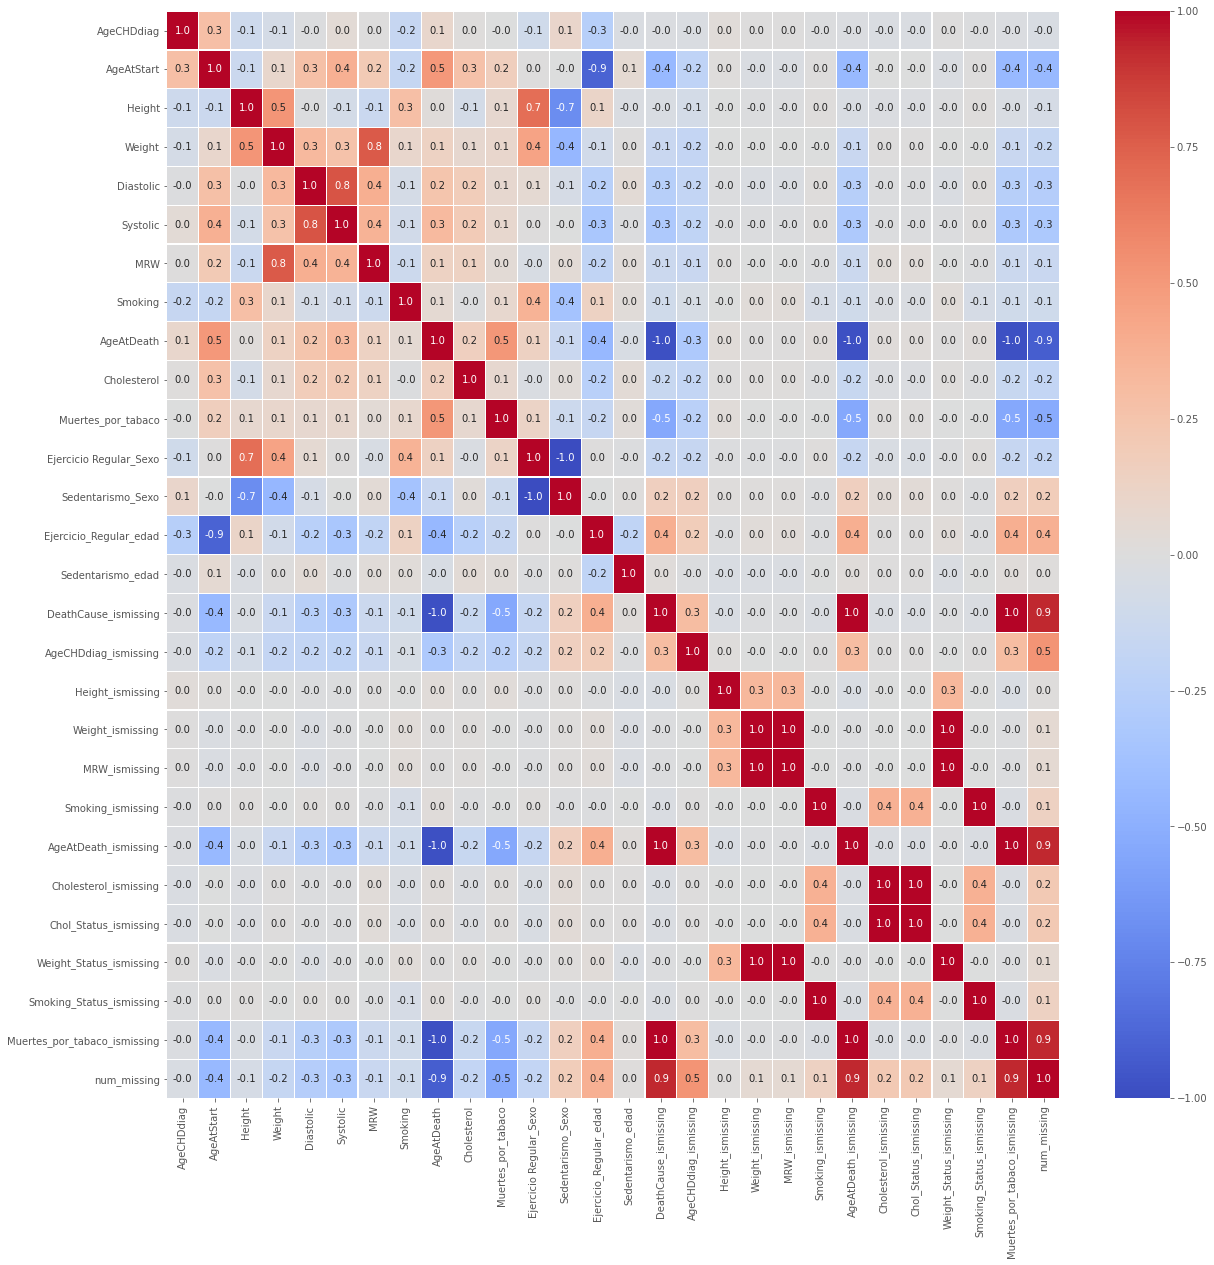

In [30]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(heart_tot.corr(), annot=True, linewidths=.18, fmt= '.1f',cmap= 'coolwarm', ax=ax)

### OUTLIERS

## Histograma /Box Plot

Cuando la característica es numérica, podemos usar un histograma y un diagrama de caja para detectar los valores atípicos.
A continuación se mostrarán los boxplot de las variables numéricas : 'AgeCHDdiag', 'AgeAtStart', 'Height', 'Weight', 'Diastolic', 'Systolic', 'MRW','Smoking', 'AgeAtDeath','Cholesterol' 

##### Age

<AxesSubplot:>

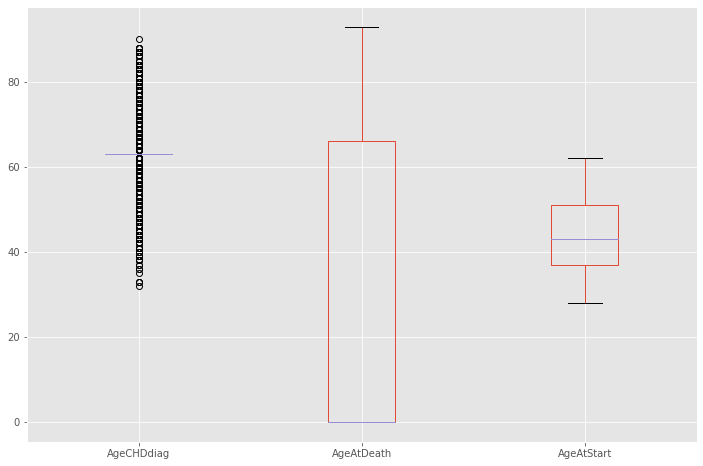

In [31]:
# box plot.
# Realizamos el box plot de las tres variables de edad juntas, debido a que estan comprendidas entre los mismos valores.
heart_tot.boxplot(column=['AgeCHDdiag','AgeAtDeath','AgeAtStart'])

Realizaremos un histogtama y un gráfico de bigotes por separado de cada una de estas variables de edad

###### AgeAtDeath

<AxesSubplot:>

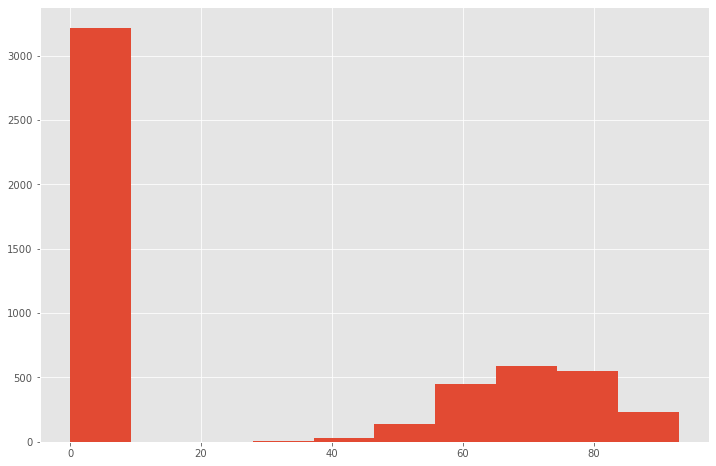

In [32]:
heart_tot['AgeAtDeath'].hist(bins=10)


<AxesSubplot:>

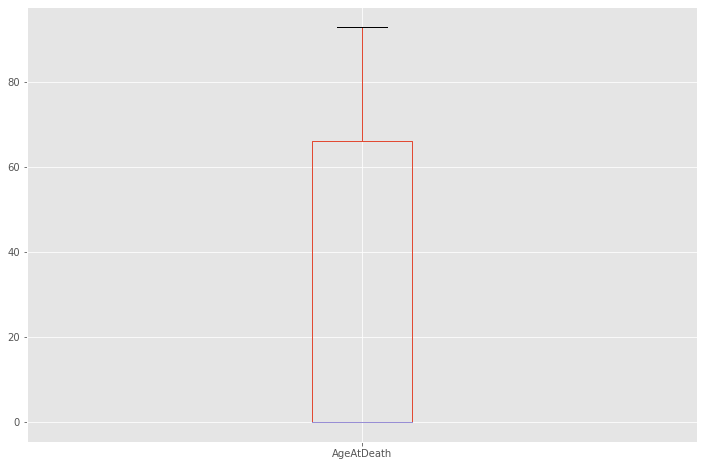

In [33]:
heart_tot.boxplot(column=['AgeAtDeath'])

Vemos con este gráfico que estas variables no parecen tener valores atípicos pero miramos los valores que tiene cada una de las variables y como están distribuidos

In [34]:
heart_tot['AgeAtDeath'].value_counts()

0.0     3218
68.0      81
80.0      76
75.0      75
74.0      72
66.0      72
79.0      68
76.0      67
69.0      67
81.0      65
73.0      64
78.0      63
71.0      63
72.0      61
70.0      60
64.0      59
58.0      57
82.0      54
77.0      54
65.0      53
84.0      53
63.0      52
67.0      50
60.0      46
85.0      45
62.0      43
61.0      42
86.0      38
59.0      35
54.0      34
57.0      34
56.0      29
55.0      27
83.0      27
89.0      24
88.0      18
51.0      17
52.0      17
53.0      16
87.0      16
50.0      14
91.0      13
90.0      12
92.0       8
48.0       8
46.0       7
47.0       6
43.0       5
45.0       5
42.0       4
49.0       3
41.0       2
36.0       2
44.0       2
39.0       2
40.0       1
93.0       1
37.0       1
38.0       1
Name: AgeAtDeath, dtype: int64

Como hemos visto anterioremente la variable AgeAtDeath aparecía vacía, ya que hay pacientes que no fallecen por la enfermedad que padecen, a lo largo del código se transformó esos valores nulos a 0, con el fin de analizar esta variable.
Como vemos entre los pacientes que fallecen por enfermedades cardiacas el mayor volumen se encuentra entre los 60 y los 80 años de edad

###### AgeCHDdiag

La variable AgeCHDdiag nos indica la edad de este estudio diagnóstico.

<AxesSubplot:>

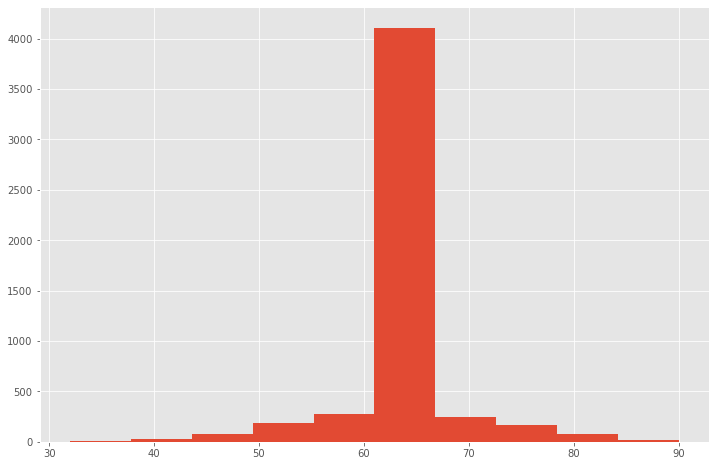

In [35]:
heart_tot['AgeCHDdiag'].hist(bins=10)


<AxesSubplot:>

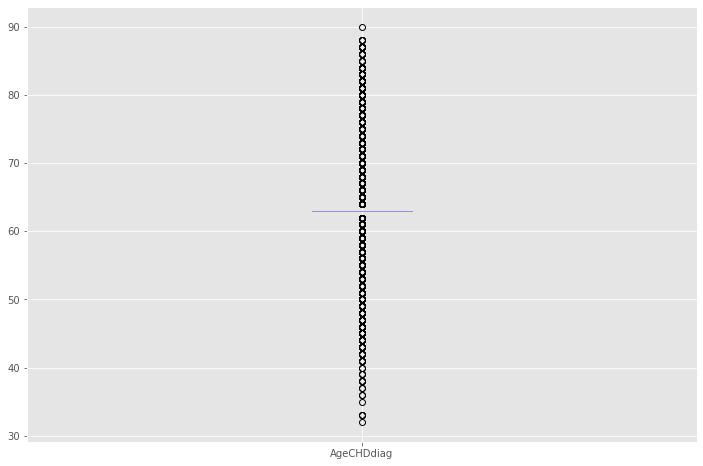

In [36]:
heart_tot.boxplot(column=['AgeCHDdiag'])

In [37]:
heart_tot['AgeCHDdiag'].value_counts()

63.0    3822
59.0      66
58.0      61
62.0      61
64.0      60
60.0      58
66.0      56
61.0      56
65.0      55
56.0      52
69.0      47
67.0      47
57.0      43
72.0      42
70.0      41
68.0      40
55.0      39
54.0      37
73.0      36
74.0      35
52.0      34
71.0      30
78.0      29
53.0      28
51.0      26
75.0      25
77.0      25
79.0      20
50.0      20
76.0      19
46.0      18
49.0      17
48.0      17
80.0      16
84.0      13
82.0      12
47.0      11
81.0      10
83.0      10
45.0      10
87.0       8
44.0       7
43.0       7
42.0       6
86.0       5
41.0       5
88.0       4
38.0       4
85.0       4
33.0       3
39.0       3
40.0       2
36.0       2
37.0       2
32.0       1
90.0       1
35.0       1
Name: AgeCHDdiag, dtype: int64

Como se puede observar tenemos un gran volumen de valores en que toman la edad 63, esto se debe a que esta variable tenía un porcentaje elevado de missing y esos missing se han imputado por la mediana de los valores existentes.

Como vemos tenemos pacientes diagnosticados con distintas edades.

###### AgeAtStart

La variable AgeAtStart nos indica la edad a la que empezaron los pacientes la enfermedad.

<AxesSubplot:>

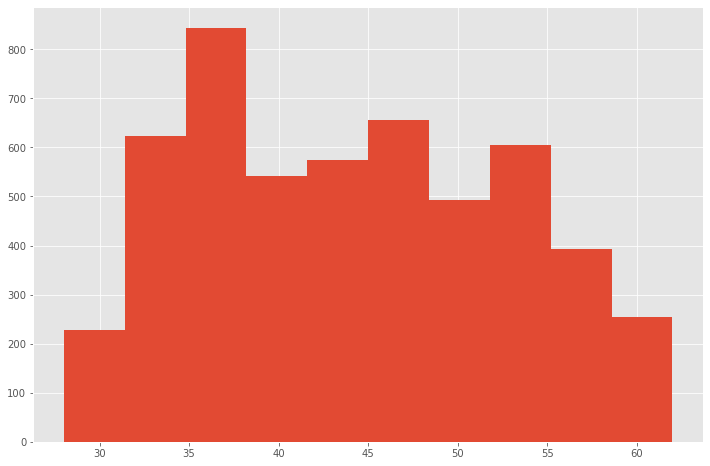

In [38]:
heart_tot['AgeAtStart'].hist(bins=10)

<AxesSubplot:>

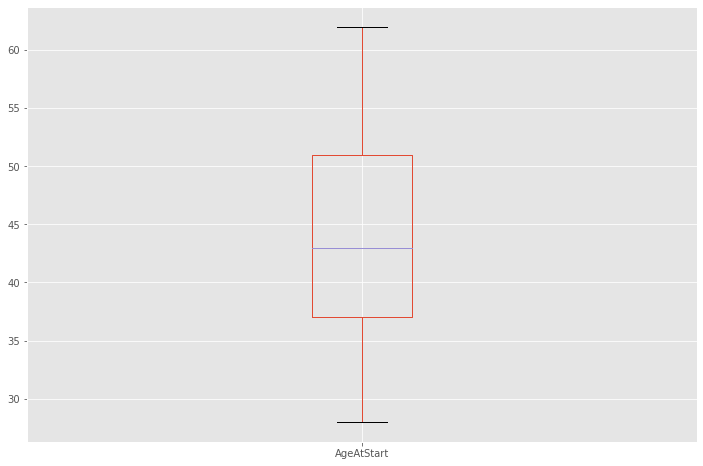

In [39]:
heart_tot.boxplot(column=['AgeAtStart'])

In [40]:
heart_tot['AgeAtStart'].value_counts()

36    230
34    219
42    211
38    210
33    205
37    205
40    205
35    199
32    199
45    190
44    189
39    183
43    174
52    174
51    171
50    169
54    168
48    158
46    154
41    154
47    154
49    152
57    141
55    139
31    139
56    133
53    124
59    120
58    118
60     80
30     65
61     40
29     22
62     14
28      1
Name: AgeAtStart, dtype: int64

Como podemos observar entre los 32 y los 40 años tenemos un pico de detecciones de las enfermedades cardiacas.

##### Height

<AxesSubplot:>

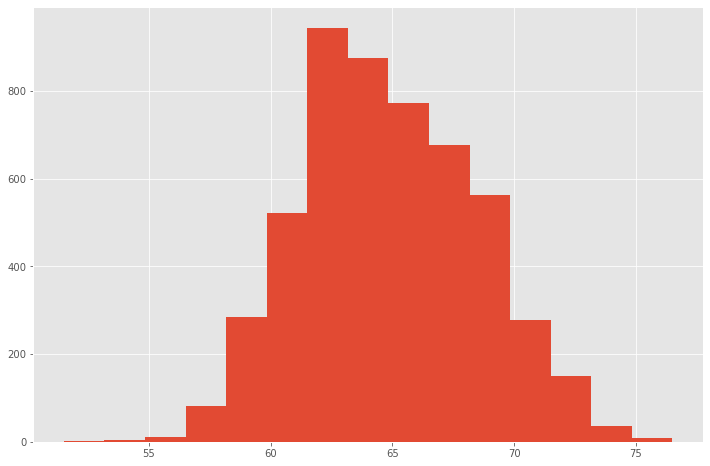

In [41]:
heart_tot['Height'].hist(bins=15)

<AxesSubplot:>

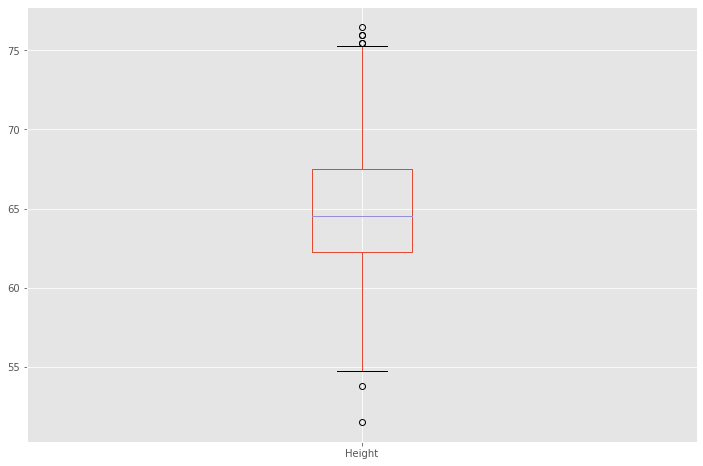

In [42]:
heart_tot.boxplot(column=['Height'])

In [43]:
heart_tot['Height'].value_counts()

62.50    175
64.50    175
65.00    170
62.00    165
63.00    161
        ... 
73.75      2
53.75      1
76.50      1
51.50      1
75.00      1
Name: Height, Length: 87, dtype: int64

No consideraremos que los valores que salen del límite inferior y superior sean outliers debido a que no se encuentran muy separados para ser considerados como tal.
Por lo tanto en esta variable no eliminamos nada.

La variable Height (Altura) está definida en pies (1 pie = 30.5 cm) nuestros datos van comprendidos entre los 55 y los 76 pies , vemos que el mayor volumen lo tenemos entre 62 y 65 

##### Weight

La variable Weight nos indica el peso del paciente medido en pounds ( 1 pound = 0.45 kg)

<AxesSubplot:>

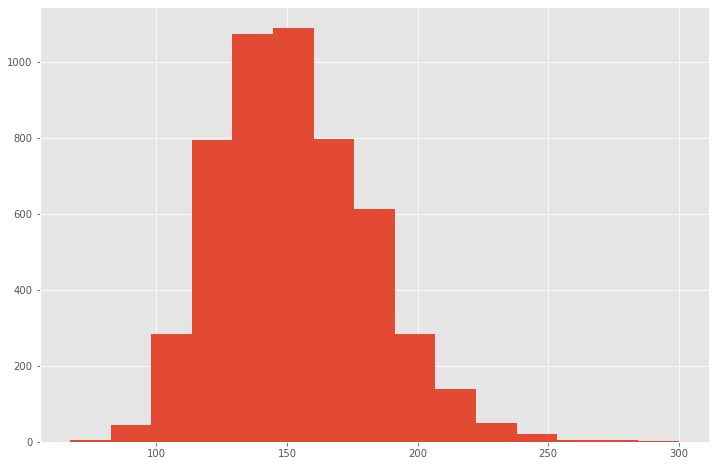

In [44]:
heart_tot['Weight'].hist(bins=15)

<AxesSubplot:>

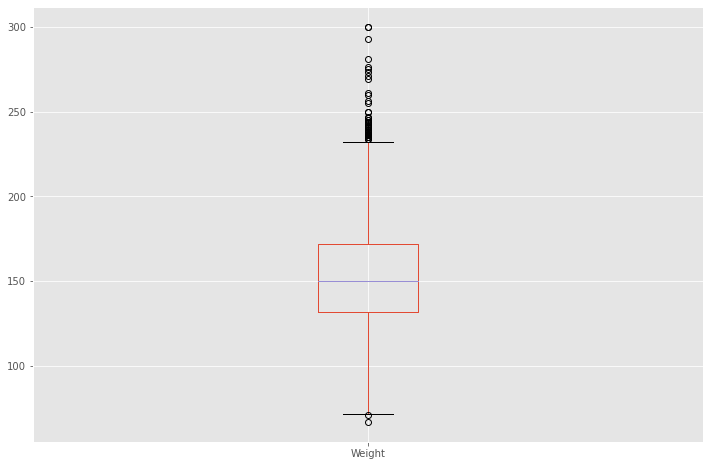

In [45]:
heart_tot.boxplot(column=['Weight'])

In [46]:
heart_tot['Weight'].value_counts()


138.0    93
137.0    88
150.0    81
145.0    78
141.0    78
         ..
293.0     1
256.0     1
281.0     1
82.0      1
273.0     1
Name: Weight, Length: 177, dtype: int64

No consideraremos que esta variable tenga outliers.Por lo tanto en esta variable no eliminamos nada.

Como vemos el mayor volumen se encuentra entre los 130 y los 170 pounds que corresponderia a pacientes entre 60 y 80 kg aproximadamente

##### Diastolic

Indica la medida diastolica del paciente los valores están comprendidos del 50 al 160

<AxesSubplot:>

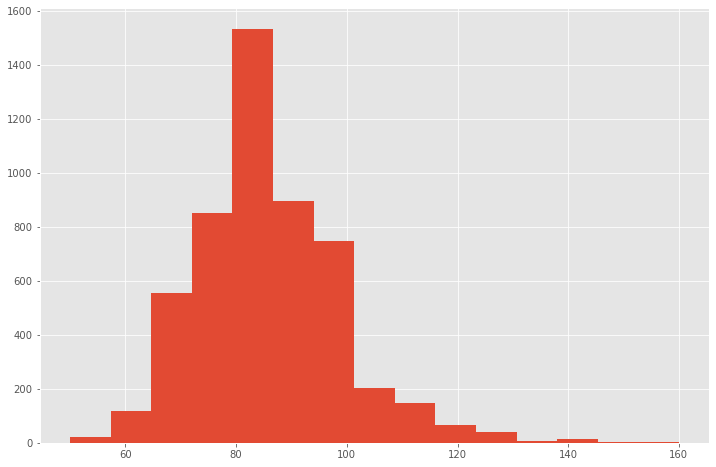

In [47]:
heart_tot['Diastolic'].hist(bins=15)

<AxesSubplot:>

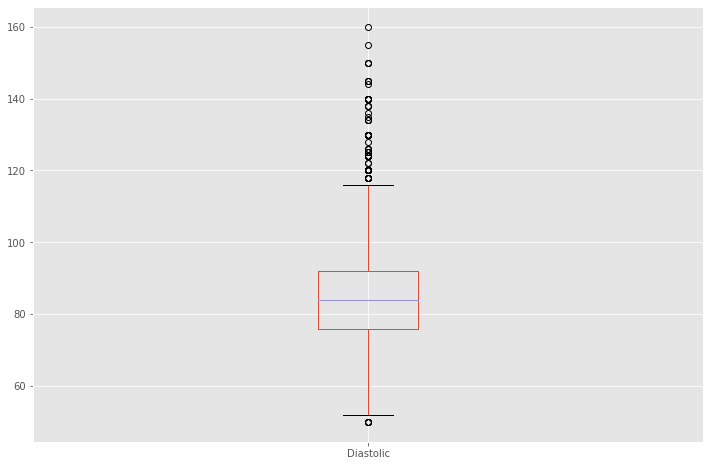

In [48]:
heart_tot.boxplot(column=['Diastolic'])

En esta variable no eliminaremos ningún valor debido a que no consideramos que haya outliers.

In [49]:
heart_tot['Diastolic'].value_counts()

80     711
90     524
70     384
84     282
100    264
      ... 
97       1
135      1
83       1
103      1
155      1
Name: Diastolic, Length: 63, dtype: int64

Los valores superiores a 80 indican una diastolica elevada, se relaciona con la sistolica para encontrar la presión arterial.

##### Systolic

Indica la medida sistolica del paciente los valores están comprendidos del 82 al 300

<AxesSubplot:>

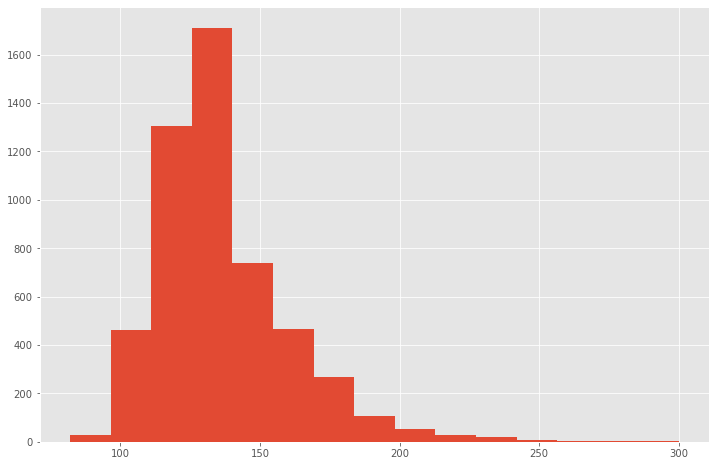

In [50]:
heart_tot['Systolic'].hist(bins=15)

<AxesSubplot:>

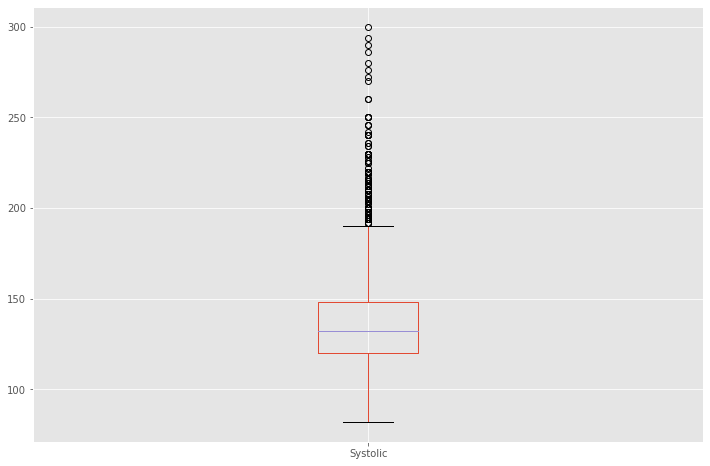

In [51]:
heart_tot.boxplot(column=['Systolic'])

En esta variable no eliminaremos ningún valor debido a que no hay presencia de outliers.

In [52]:
heart_tot['Systolic'].value_counts()

120    370
130    341
140    326
110    204
124    204
      ... 
82       1
280      1
300      1
157      1
92       1
Name: Systolic, Length: 109, dtype: int64

Los valores más comunes se encuentran en 120, si el paciente tiene un valor menor de 120 tenemos una sistólica normal

##### MRW

Nos indica la proporción del peso real entre el peso deseable 

<AxesSubplot:>

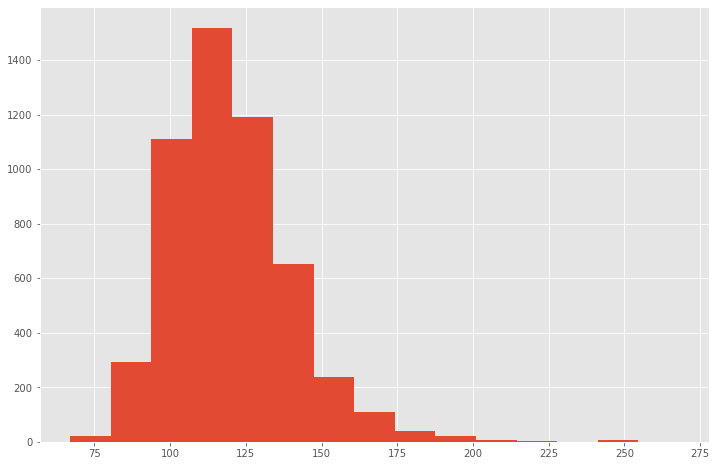

In [53]:
heart_tot['MRW'].hist(bins=15)

<AxesSubplot:>

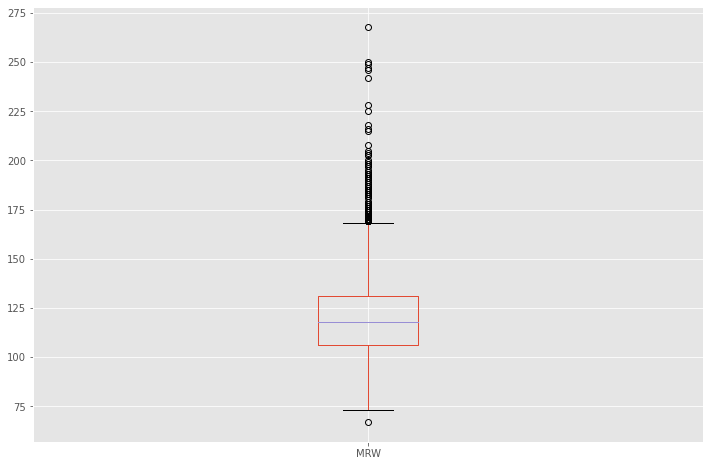

In [54]:
heart_tot.boxplot(column=['MRW'])

En esta variable no eliminaremos ningún valor debido a que no consideramos que haya presencia de outliers.

In [55]:
heart_tot['MRW'].value_counts()

113.0    153
119.0    131
118.0    129
114.0    121
111.0    119
        ... 
216.0      1
246.0      1
188.0      1
225.0      1
249.0      1
Name: MRW, Length: 141, dtype: int64

##### Smoking

Nos indica el número de cigarros que un paciente fuma en un día

<AxesSubplot:>

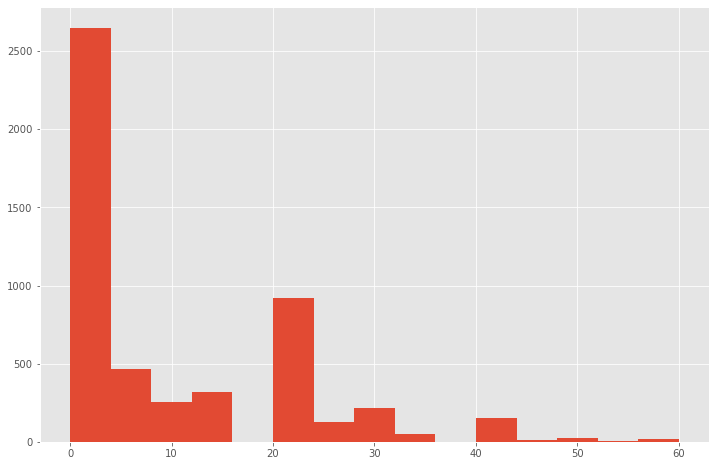

In [56]:
heart_tot['Smoking'].hist(bins=15)

<AxesSubplot:>

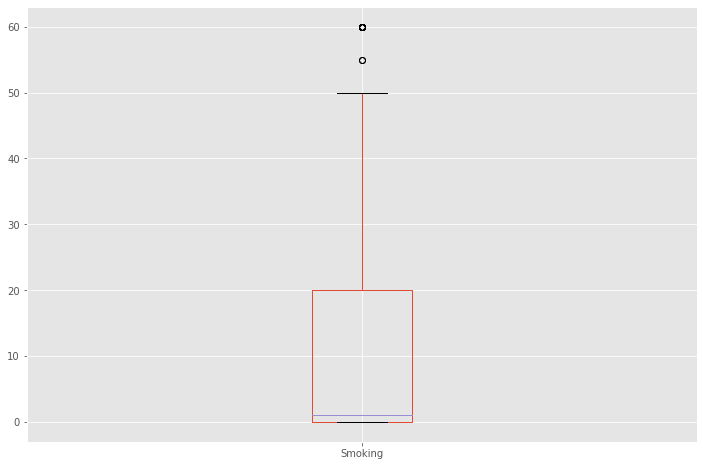

In [57]:
heart_tot.boxplot(column=['Smoking'])

En esta variable no eliminaremos ningún valor debido a que no consideramos que haya presencia de outliers.


In [58]:
heart_tot['Smoking'].value_counts()

0.0     2501
20.0     921
5.0      466
15.0     321
10.0     255
30.0     215
40.0     151
1.0      149
25.0     125
35.0      49
50.0      26
60.0      15
45.0      13
55.0       2
Name: Smoking, dtype: int64

Tenemos un alto % de pacientes que no fuman en nuestro estudio.

##### Cholesterol

Colesterol del paciente va entre 96 y 568

<AxesSubplot:>

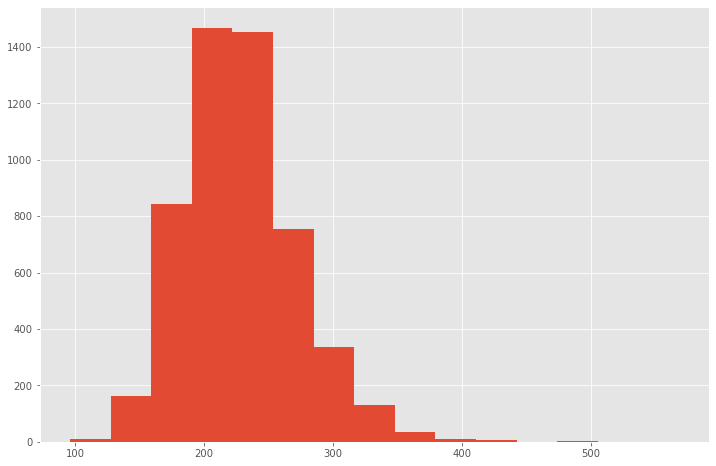

In [59]:
heart_tot['Cholesterol'].hist(bins=15)

<AxesSubplot:>

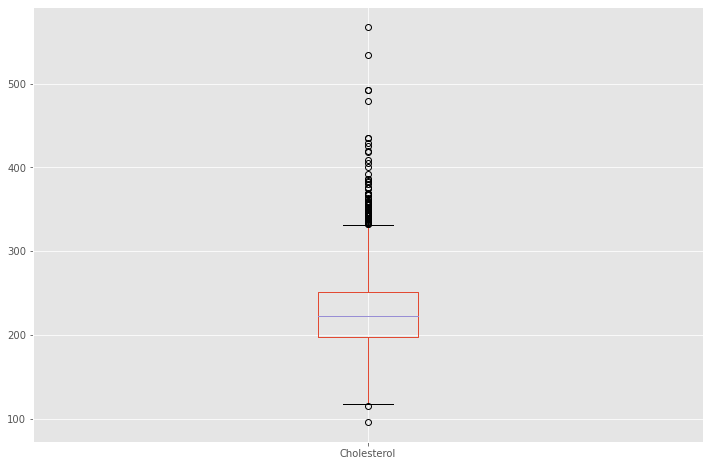

In [60]:
heart_tot.boxplot(column=['Cholesterol'])

No eliminaremos los registros que tienen un colesterol fuera de los parametros normales, ya que pueden ser útiles a la hora de predecir el fallecimiento de un paciente.

In [61]:
heart_tot['Cholesterol'].value_counts()

223.0    193
200.0    154
209.0    126
234.0     99
242.0     99
        ... 
429.0      1
479.0      1
375.0      1
339.0      1
369.0      1
Name: Cholesterol, Length: 250, dtype: int64

##### Muertes_por_tabaco

<AxesSubplot:>

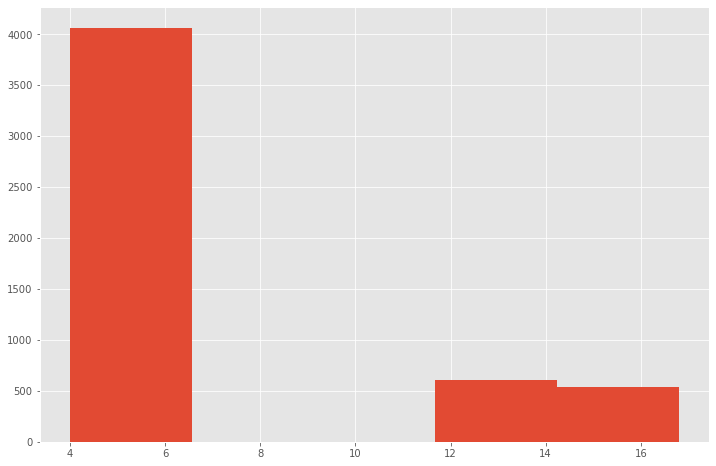

In [62]:
heart_tot['Muertes_por_tabaco'].hist(bins=5)

<AxesSubplot:>

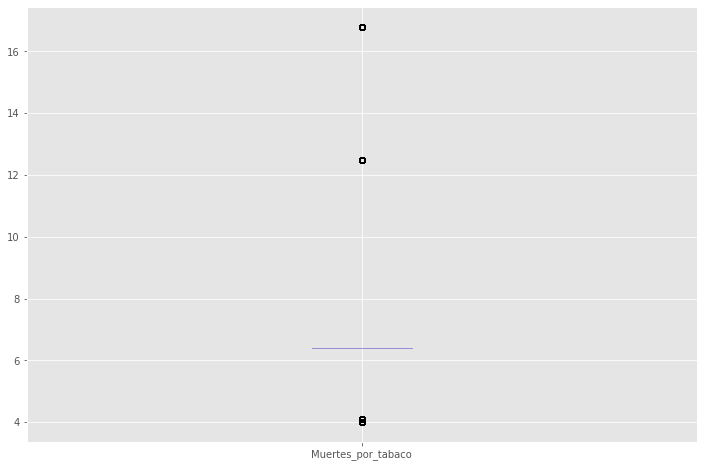

In [63]:
heart_tot.boxplot(column=['Muertes_por_tabaco'])

In [64]:
heart_tot['Muertes_por_tabaco'].value_counts()

6.4     3575
12.5     605
16.8     539
4.1      378
4.0      112
Name: Muertes_por_tabaco, dtype: int64

En esta variable no tenemos outliers. Es una variable que indica el porcentaje de la población que fallece por la causa del tabaco 
al año por 100K habitantes.

##### Ejercicio Regular_Sexo

<AxesSubplot:>

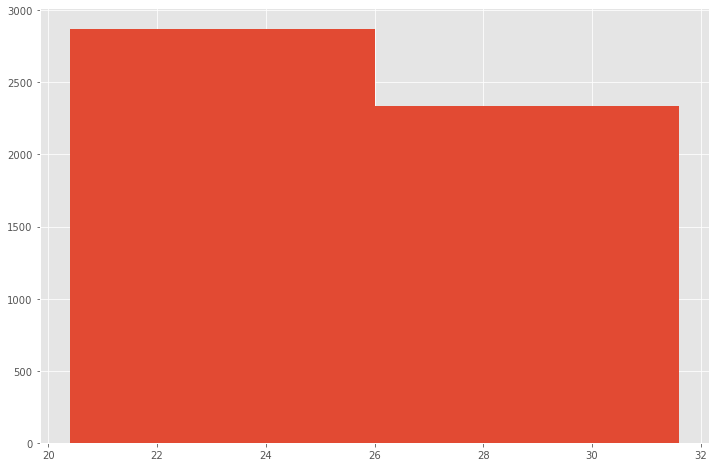

In [65]:
heart_tot['Ejercicio Regular_Sexo'].hist(bins=2)

<AxesSubplot:>

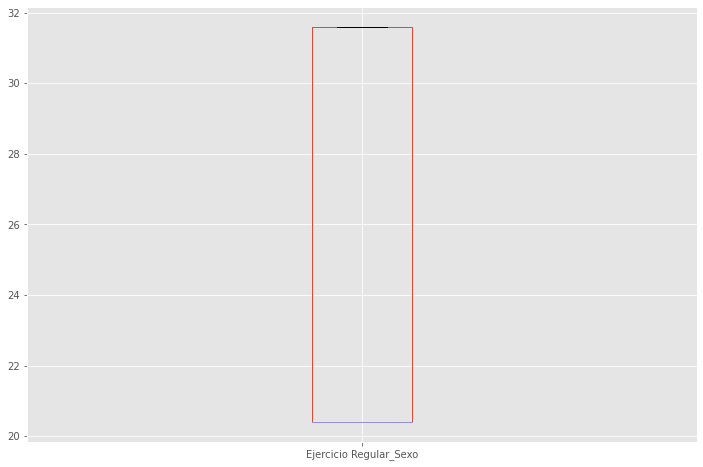

In [66]:
heart_tot.boxplot(column=['Ejercicio Regular_Sexo'])

In [67]:
heart_tot['Ejercicio Regular_Sexo'].value_counts()

20.4    2873
31.6    2336
Name: Ejercicio Regular_Sexo, dtype: int64

En esta variable no tenemos presencia de outliers. Indica el % de personas que realizan ejercicio regular por sexo.

##### Sedentarismo_Sexo

<AxesSubplot:>

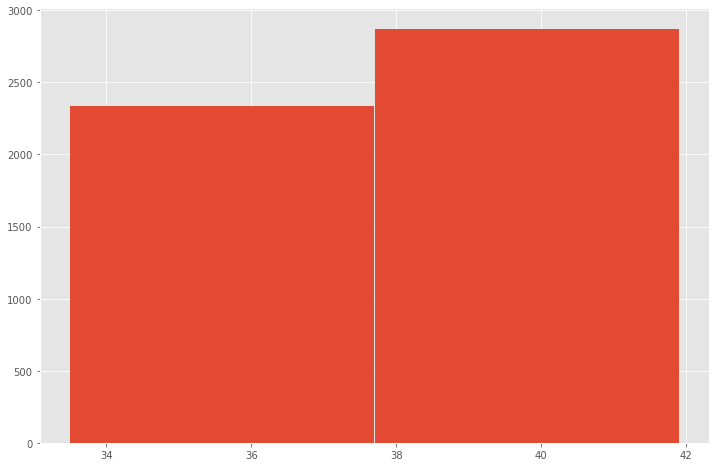

In [68]:
heart_tot['Sedentarismo_Sexo'].hist(bins=2)

<AxesSubplot:>

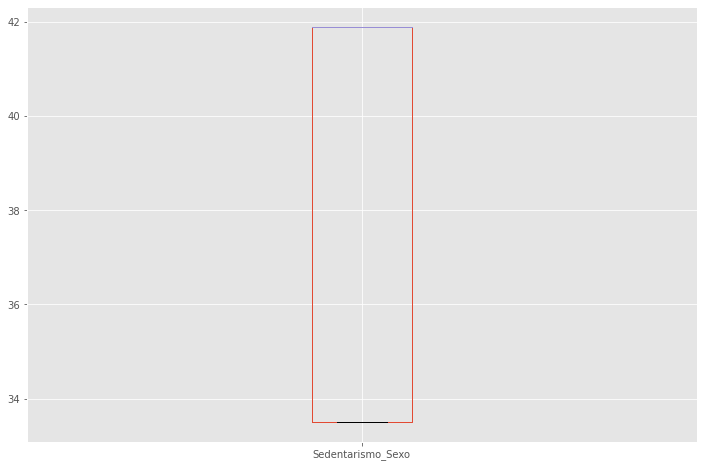

In [69]:
heart_tot.boxplot(column=['Sedentarismo_Sexo'])

In [70]:
heart_tot['Sedentarismo_Sexo'].value_counts()

41.9    2873
33.5    2336
Name: Sedentarismo_Sexo, dtype: int64

Esta variable no tiene presencia de outliers. Indica el % de sedentarismo por sexo.

##### Ejercicio_Regular_edad

<AxesSubplot:>

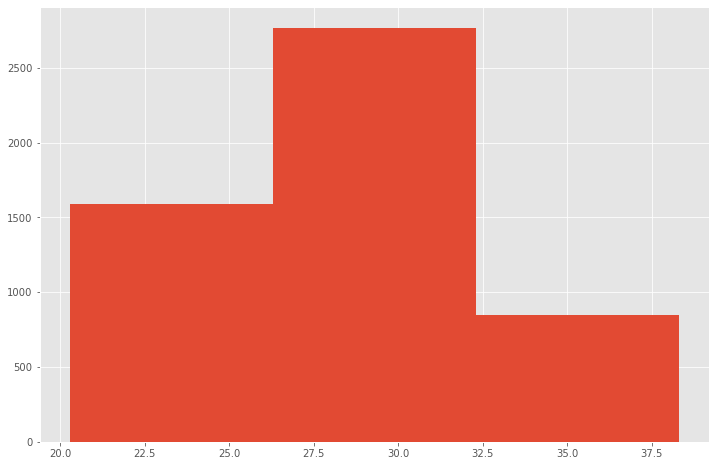

In [71]:
heart_tot['Ejercicio_Regular_edad'].hist(bins=3)

<AxesSubplot:>

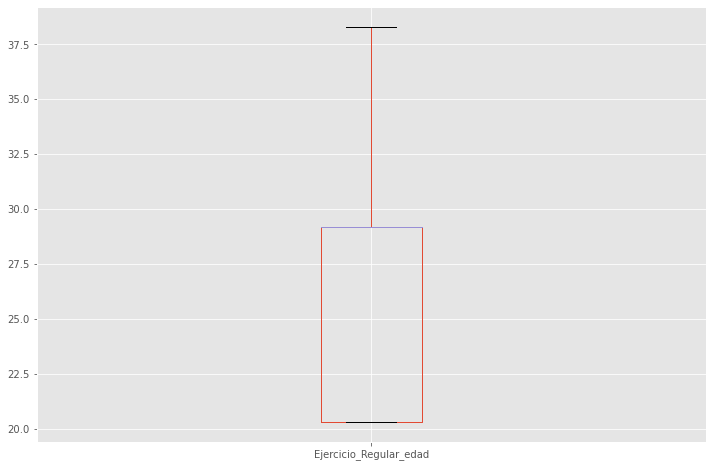

In [72]:
heart_tot.boxplot(column=['Ejercicio_Regular_edad'])

In [73]:
heart_tot['Ejercicio_Regular_edad'].value_counts()

29.2    2768
20.3    1591
38.3     850
Name: Ejercicio_Regular_edad, dtype: int64

Esta variable no tiene presencia de outliers. Indica el % de ejercicio regular por edad.

##### Sedentarismo_edad

<AxesSubplot:>

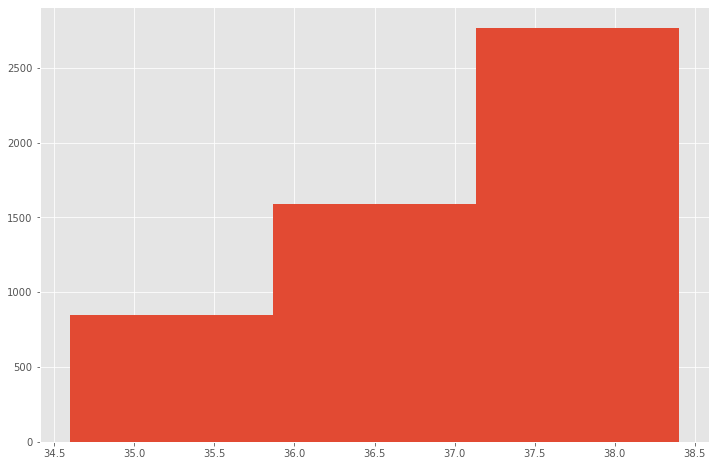

In [74]:
heart_tot['Sedentarismo_edad'].hist(bins=3)

<AxesSubplot:>

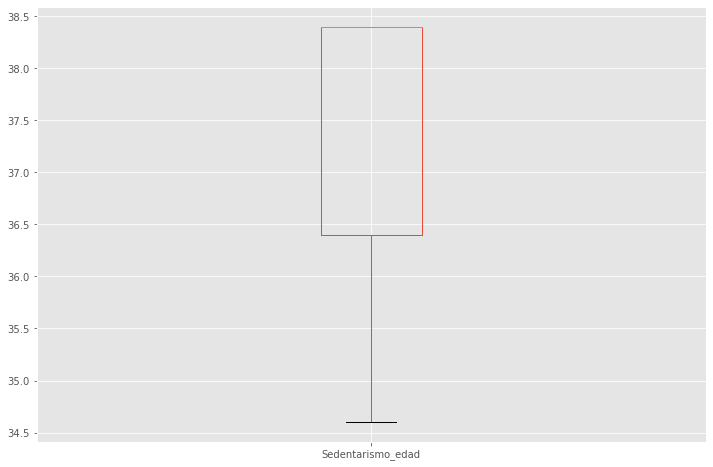

In [75]:
heart_tot.boxplot(column=['Sedentarismo_edad'])

In [76]:
heart_tot['Sedentarismo_edad'].value_counts()

38.4    2768
36.4    1591
34.6     850
Name: Sedentarismo_edad, dtype: int64

Esta variable no tiene presencia de outliers. Indica el % de sedentarismo por edad.

Como vemos ninguna de las variables numéricas tienen presencia de outliers. Tenemos un dataset con valores muy variados, por lo que no consideraremos valores atípicos, ya que pueden considerarse válidos.

<AxesSubplot:>

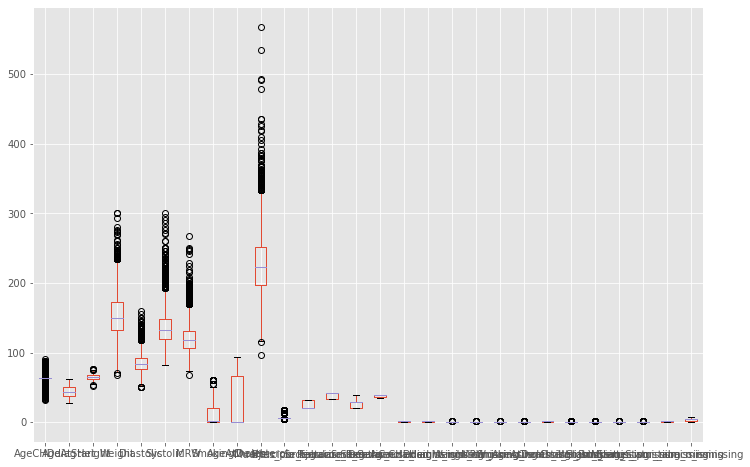

In [77]:
heart_tot.boxplot()

## Bar Chart

##### Status

<AxesSubplot:>

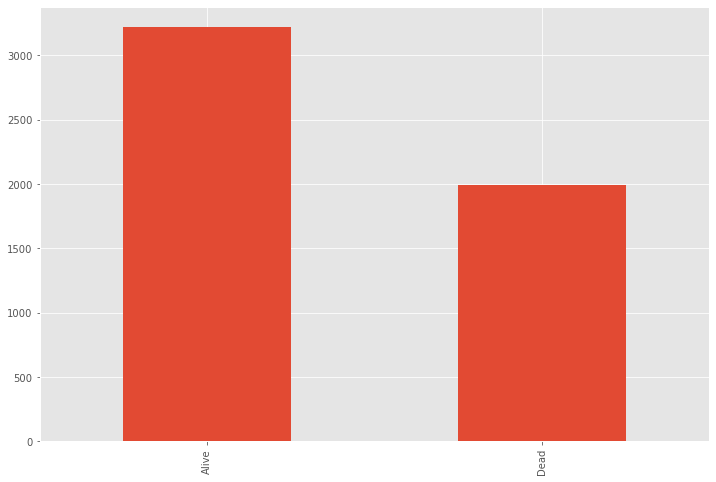

In [78]:
heart_tot['Status'].value_counts().plot.bar()

In [79]:
heart_tot['Status'].value_counts()

Alive    3218
Dead     1991
Name: Status, dtype: int64

Tenemos 3218 pacientes que no fallecen y 1991 pacientes que fallecen.

Esta variable nos servirá para crear nuestra variable objetivo

##### DeathCause

<AxesSubplot:>

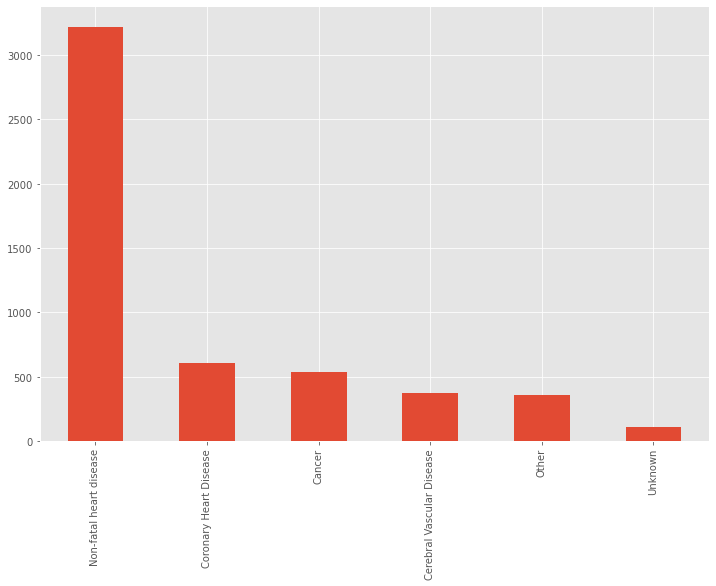

In [80]:
heart_tot['DeathCause'].value_counts().plot.bar()

Como vemos el valor de la categoria Non-Fatal Heart Disease es muy superior al resto, esto se debe a que estos pacientes no fallecen. La personas que fallecen se distribuyen entre el resto de las enfermedades.

In [81]:
heart_tot['DeathCause'].value_counts()

Non-fatal heart disease      3218
Coronary Heart Disease        605
Cancer                        539
Cerebral Vascular Disease     378
Other                         357
Unknown                       112
Name: DeathCause, dtype: int64

##### Sex

<AxesSubplot:>

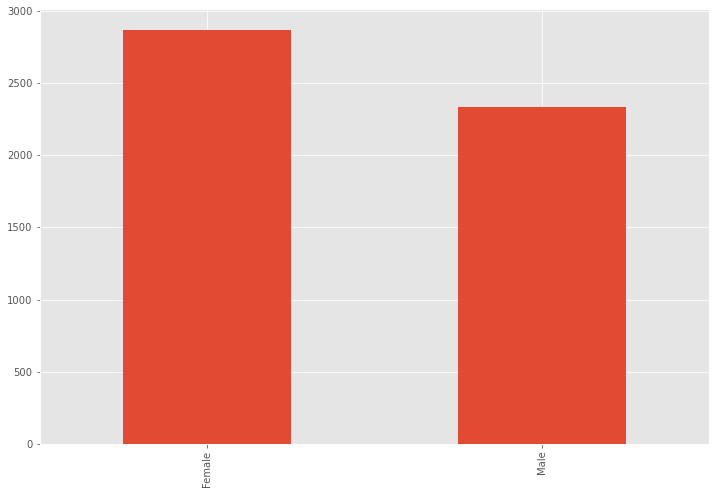

In [82]:
heart_tot['Sex'].value_counts().plot.bar()

Tenemos más mujeres que hombres, pero se encuentra balanceada nuestra muestra:

In [83]:
heart_tot['Sex'].value_counts()

Female    2873
Male      2336
Name: Sex, dtype: int64

Tenemos 2855 mujeres y 2325 hombres.

##### Chol_Status

<AxesSubplot:>

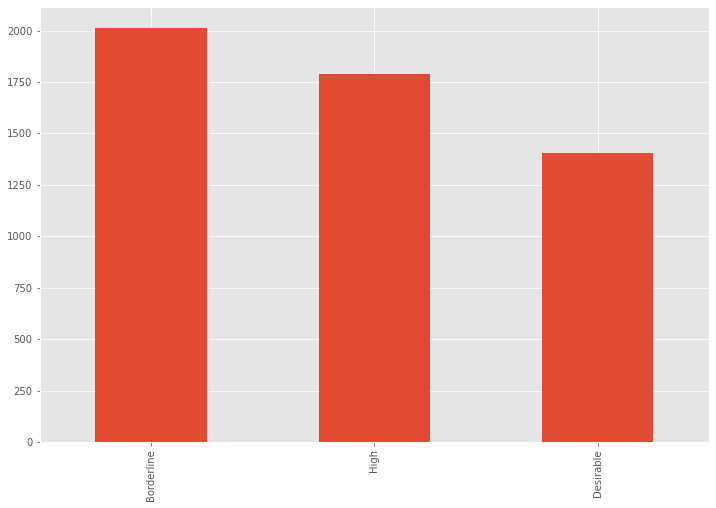

In [84]:
heart_tot['Chol_Status'].value_counts().plot.bar()

Tenemos un mayor número de la categoria Limite, estos pacientes tienen el colesterol alto, como sabemos esta variable y la variable colesterol te da una información complementaria.

In [85]:
heart_tot['Chol_Status'].value_counts()

Borderline    2013
High          1791
Desirable     1405
Name: Chol_Status, dtype: int64

##### BP_Status

<AxesSubplot:>

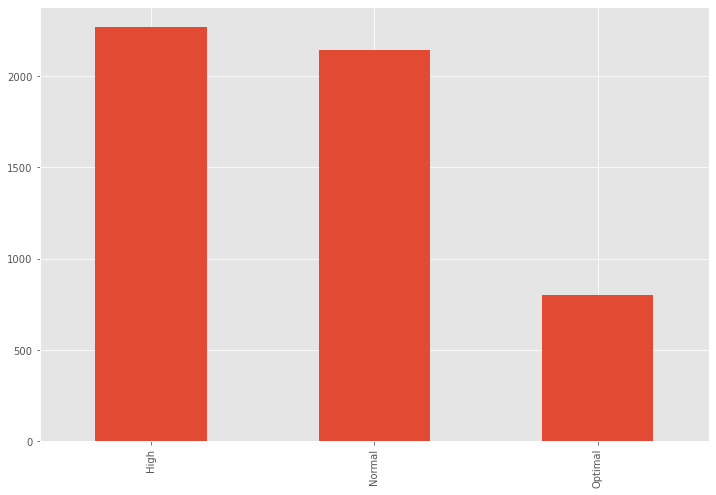

In [86]:
heart_tot['BP_Status'].value_counts().plot.bar()

Tenemos un mayor número de la categoria Alta.

In [87]:
heart_tot['BP_Status'].value_counts()

High       2267
Normal     2143
Optimal     799
Name: BP_Status, dtype: int64

##### Weight_Status

<AxesSubplot:>

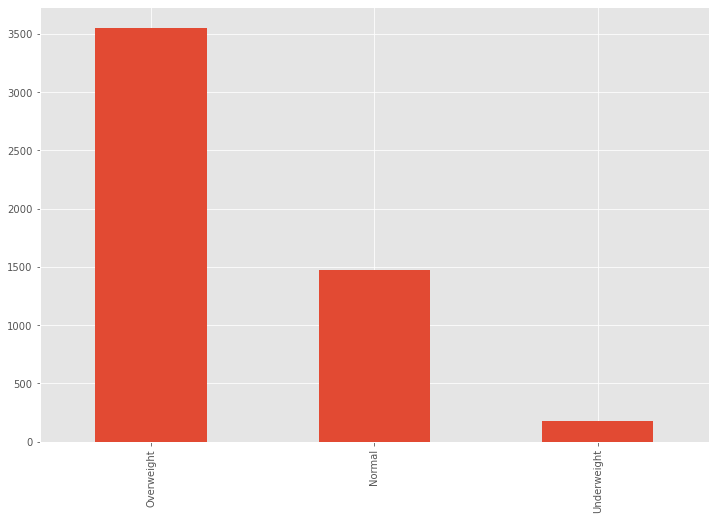

In [88]:
heart_tot['Weight_Status'].value_counts().plot.bar()

Tenemos más personas con sobrepeso, esta variable estará relacionada con la variable numérica Weight.

In [89]:
heart_tot['Weight_Status'].value_counts()

Overweight     3556
Normal         1472
Underweight     181
Name: Weight_Status, dtype: int64

##### Smoking_Status

<AxesSubplot:>

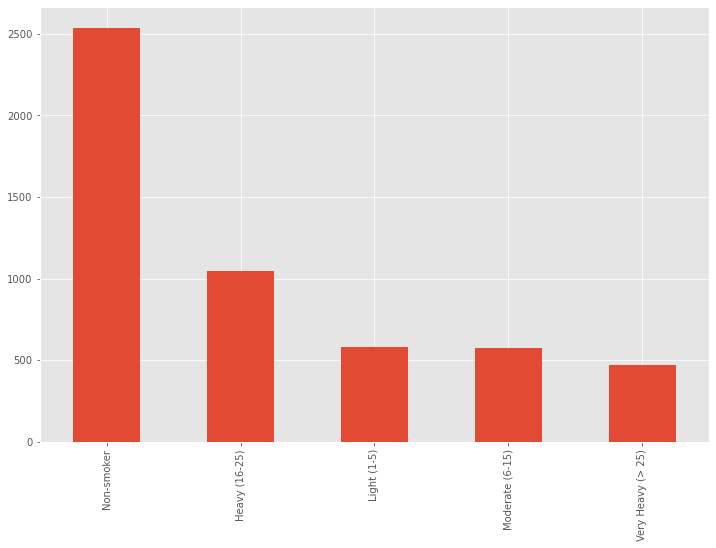

In [90]:
heart_tot['Smoking_Status'].value_counts().plot.bar()

Aunque a simple vista pueda parecer que tenemos más pacientes que no fuman, si sumamos los registros de los fumadores tenemos:
    
    2523 -> Pacientes no fumadores
    2657 -> Pacientes si fumadores

In [91]:
heart_tot['Smoking_Status'].value_counts()

Non-smoker           2537
Heavy (16-25)        1046
Light (1-5)           579
Moderate (6-15)       576
Very Heavy (> 25)     471
Name: Smoking_Status, dtype: int64

## Tipo innecesario 1: Desinformativo / Repetitivo

In [92]:
num_rows = len(heart_tot.index)
low_information_cols = [] #

for col in heart_tot.columns:
    cnts = heart_tot[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.9:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Height_ismissing: 99.88481%
False    5203
True        6
Name: Height_ismissing, dtype: int64

Weight_ismissing: 99.88481%
False    5203
True        6
Name: Weight_ismissing, dtype: int64

MRW_ismissing: 99.88481%
False    5203
True        6
Name: MRW_ismissing, dtype: int64

Smoking_ismissing: 99.30889%
False    5173
True       36
Name: Smoking_ismissing, dtype: int64

Cholesterol_ismissing: 97.08197%
False    5057
True      152
Name: Cholesterol_ismissing, dtype: int64

Chol_Status_ismissing: 97.08197%
False    5057
True      152
Name: Chol_Status_ismissing, dtype: int64

Weight_Status_ismissing: 99.88481%
False    5203
True        6
Name: Weight_Status_ismissing, dtype: int64

Smoking_Status_ismissing: 99.30889%
False    5173
True       36
Name: Smoking_Status_ismissing, dtype: int64



Solo aparecerán las variables que se generan al imputar los missing, estas variables son informativas de si se han tratado e imputado esos valores o no,por lo que resultan útiles.
Pero no eliminaremos ninguna variable por valores repetitivos.

In [93]:
num_rows = len(heart_tot.index)
low_information_cols = [] #

for col in heart_tot.columns:
    cnts = heart_tot[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.7:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

AgeCHDdiag: 73.37301%
63.0    3822
59.0      66
58.0      61
62.0      61
64.0      60
60.0      58
66.0      56
61.0      56
65.0      55
56.0      52
69.0      47
67.0      47
57.0      43
72.0      42
70.0      41
68.0      40
55.0      39
54.0      37
73.0      36
74.0      35
52.0      34
71.0      30
78.0      29
53.0      28
51.0      26
75.0      25
77.0      25
79.0      20
50.0      20
76.0      19
46.0      18
49.0      17
48.0      17
80.0      16
84.0      13
82.0      12
47.0      11
81.0      10
83.0      10
45.0      10
87.0       8
44.0       7
43.0       7
42.0       6
86.0       5
41.0       5
88.0       4
38.0       4
85.0       4
33.0       3
39.0       3
40.0       2
36.0       2
37.0       2
32.0       1
90.0       1
35.0       1
Name: AgeCHDdiag, dtype: int64

AgeCHDdiag_ismissing: 72.18276%
True     3760
False    1449
Name: AgeCHDdiag_ismissing, dtype: int64

Height_ismissing: 99.88481%
False    5203
True        6
Name: Height_ismissing, dtype: int64

Weight_is

Si bajamos el % al 70% vamos que aparece la variable AgeCHDdiag que nos indica los años del diagnostico, esta variable aparece porque se han imputado los missing, como el valor más repetido que es 63.


# Creación de nuevas variables.

El modelo que podremos realizar con nuestro conjunto de datos es supervisado, por lo que generaremos nuestra variable objetivo a partir de la variable Status. 

###### Target

In [94]:

heart_tot['Target']=heart_tot['Status'].map({'Dead':1,'Alive':0})

# Nuestra variable objetivo será 1 cuando Status sea Dead y 0 cuando Status sea Alive.

<AxesSubplot:>

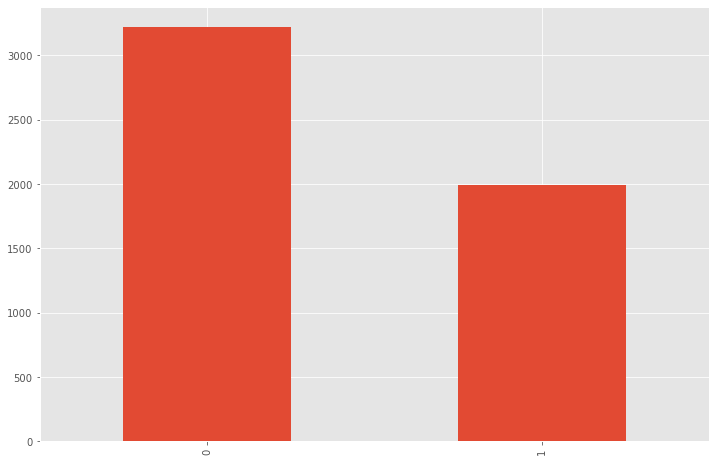

In [95]:
heart_tot['Target'].value_counts().plot.bar()

In [96]:
heart_tot['Target'].value_counts()

0    3218
1    1991
Name: Target, dtype: int64

###### AgeDisease

Podemos calcular nuevas variables a partir de las variables existentes, en este caso vamos a generar la variable AgeDisease que nos indicará el número de años que ha estado una persona enferma, desde el comienzo de la enfermedad hasta la muerte.

In [97]:
heart_tot['AgeDisease']=heart_tot['AgeAtDeath']-heart_tot['AgeAtStart']
heart_tot.head()
# Nuestra nueva variabla calculará los años que una persona ha estado enferma.

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Smoking_ismissing,AgeAtDeath_ismissing,Cholesterol_ismissing,Chol_Status_ismissing,Weight_Status_ismissing,Smoking_Status_ismissing,Muertes_por_tabaco_ismissing,num_missing,Target,AgeDisease
0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,121.0,...,False,False,True,True,False,False,False,3,1,26.0
1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,183.0,...,False,False,False,False,False,False,False,1,1,16.0
2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,114.0,...,False,True,False,False,False,False,True,4,0,-57.0
3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,123.0,...,False,True,False,False,False,False,True,4,0,-39.0
4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,116.0,...,False,True,False,False,False,False,True,4,0,-42.0


Los datos negativos indican que esos pacientes no fallecen.

In [98]:
heart_tot['AgeDisease'].value_counts()

 32.0    237
 26.0    204
 30.0    185
 28.0    184
-34.0    183
 22.0    181
-36.0    178
-33.0    177
-32.0    172
-37.0    169
 24.0    167
-38.0    165
-35.0    165
-42.0    156
-40.0    151
 20.0    145
 18.0    140
-45.0    134
-39.0    131
-31.0    128
-43.0    120
 16.0    119
-44.0    117
-41.0    111
 12.0    102
 14.0     97
-47.0     92
-46.0     90
-50.0     83
-51.0     82
-48.0     81
 10.0     79
-49.0     78
-52.0     71
 8.0      64
-30.0     59
-55.0     55
-54.0     55
 6.0      54
-53.0     53
-57.0     41
-56.0     40
 4.0      33
-58.0     26
-29.0     19
-59.0     18
-60.0      8
-61.0      7
-62.0      2
-28.0      1
Name: AgeDisease, dtype: int64

In [99]:
heart_tot['AgeDisease'][heart_tot['AgeDisease'] < 0] = 0

In [100]:
heart_tot['AgeDisease'].value_counts()

0.0     3218
32.0     237
26.0     204
30.0     185
28.0     184
22.0     181
24.0     167
20.0     145
18.0     140
16.0     119
12.0     102
14.0      97
10.0      79
8.0       64
6.0       54
4.0       33
Name: AgeDisease, dtype: int64

In [101]:
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Smoking_ismissing,AgeAtDeath_ismissing,Cholesterol_ismissing,Chol_Status_ismissing,Weight_Status_ismissing,Smoking_Status_ismissing,Muertes_por_tabaco_ismissing,num_missing,Target,AgeDisease
0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,121.0,...,False,False,True,True,False,False,False,3,1,26.0
1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,183.0,...,False,False,False,False,False,False,False,1,1,16.0
2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,114.0,...,False,True,False,False,False,False,True,4,0,0.0
3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,123.0,...,False,True,False,False,False,False,True,4,0,0.0
4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,116.0,...,False,True,False,False,False,False,True,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,False,False,False,False,False,False,False,0,1,32.0
5205,Alive,Non-fatal heart disease,63.0,Female,42,60.00,141.0,76,124,129.0,...,False,True,False,False,False,False,True,4,0,0.0
5206,Alive,Non-fatal heart disease,63.0,Female,51,58.25,123.0,90,152,119.0,...,False,True,False,False,False,False,True,4,0,0.0
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,False,False,False,False,False,False,False,0,1,28.0


En nuestro conjunto de datos tenemos dos variables que combinadas nos indican la presión arterial del paciente por lo que nos crearemos una función llamada presión arterial a través de la sistólica y la diastólica.




# Transformación de variables alfanuméricas en numéricas

##### Una vez que hemos visto nuestro conjunto de datos, en el cual hemos imputado los missing, hemos mirado los outliers y las categorías que tienen nuestras variables , hemos creado variables nuevas y que no encontramos errores tipograficos en dichas variables al analizarlas. Nuestro conjunto de datos ya tendría realizada la limpieza de datos.

Cuando decidamos un modelo análitico para realizar, deberemos generar las variables alfanuméricas como variables numéricas para poder utilizarlas en el modelo.

Generamos primero las variables dummies que necesitamos, en nuestro caso en DeathCause y en Sex

###### DeathCause

In [102]:
DeathCause_dummies = pd.get_dummies(heart_tot['DeathCause'], sparse=True)
DeathCause_dummies


,Cancer,Cerebral Vascular Disease,Coronary Heart Disease,Non-fatal heart disease,Other,Unknown
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
5204,0,0,1,0,0,0
5205,0,0,0,1,0,0
5206,0,0,0,1,0,0
5207,0,0,1,0,0,0


In [103]:
heart_tot=pd.concat([heart_tot, DeathCause_dummies], axis=1)
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Muertes_por_tabaco_ismissing,num_missing,Target,AgeDisease,Cancer,Cerebral Vascular Disease,Coronary Heart Disease,Non-fatal heart disease,Other,Unknown
0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,121.0,...,False,3,1,26.0,0,0,0,0,1,0
1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,183.0,...,False,1,1,16.0,1,0,0,0,0,0
2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,114.0,...,True,4,0,0.0,0,0,0,1,0,0
3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,123.0,...,True,4,0,0.0,0,0,0,1,0,0
4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,116.0,...,True,4,0,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,False,0,1,32.0,0,0,1,0,0,0
5205,Alive,Non-fatal heart disease,63.0,Female,42,60.00,141.0,76,124,129.0,...,True,4,0,0.0,0,0,0,1,0,0
5206,Alive,Non-fatal heart disease,63.0,Female,51,58.25,123.0,90,152,119.0,...,True,4,0,0.0,0,0,0,1,0,0
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,False,0,1,28.0,0,0,1,0,0,0


###### Sex

In [104]:
Sex_dummies = pd.get_dummies(heart_tot['Sex'], sparse=True)
Sex_dummies

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
5204,0,1
5205,1,0
5206,1,0
5207,0,1


In [105]:
heart_tot=pd.concat([heart_tot, Sex_dummies], axis=1)
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Target,AgeDisease,Cancer,Cerebral Vascular Disease,Coronary Heart Disease,Non-fatal heart disease,Other,Unknown,Female,Male
0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,121.0,...,1,26.0,0,0,0,0,1,0,1,0
1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,183.0,...,1,16.0,1,0,0,0,0,0,1,0
2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,114.0,...,0,0.0,0,0,0,1,0,0,1,0
3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,123.0,...,0,0.0,0,0,0,1,0,0,1,0
4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,116.0,...,0,0.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,1,32.0,0,0,1,0,0,0,0,1
5205,Alive,Non-fatal heart disease,63.0,Female,42,60.00,141.0,76,124,129.0,...,0,0.0,0,0,0,1,0,0,1,0
5206,Alive,Non-fatal heart disease,63.0,Female,51,58.25,123.0,90,152,119.0,...,0,0.0,0,0,0,1,0,0,1,0
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,1,28.0,0,0,1,0,0,0,0,1


Una vez que hemos realizado las dos dummies, necesitaremos transformar el resto de nuestras variables alfanuméricas, en numéricas. 
En este caso no será una dummies, debido a que unas caracteristicas si que son peores que otras, es decir, se pueden ordenar de menor a mayor relevancia

##### Chol_Status


Vemos los valores que tiene la variable Chol_status. Queremos transformar desirable en 1 high en 2 y desirable en 3.

In [106]:
heart_tot['Chol_Status'].value_counts()

Borderline    2013
High          1791
Desirable     1405
Name: Chol_Status, dtype: int64

Para ello, ponemos las siguientes condiciones y generamos una nueva variable que es Chol_Status_Num

In [107]:
conditions = [
    (heart_tot['Chol_Status'] == 'Desirable'),
    (heart_tot['Chol_Status'] == 'High'),
    (heart_tot['Chol_Status'] == 'Borderline')]
choices = ['1', '2', '3']
heart_tot['Chol_Status_Num'] = np.select(conditions, choices)

Visualizamos que tenemos el mismo número en esta variable creada que en Chol_Status.

In [108]:
heart_tot['Chol_Status_Num'].value_counts()

3    2013
2    1791
1    1405
Name: Chol_Status_Num, dtype: int64

Generandonos así la variable numérica a traves de la variable alfanumerica.

##### BP_Status

Vemos los valores que tiene la variable BP_Status. Queremos transformar optimal en 1 normal en 2 y high en 3.

In [109]:
heart_tot['BP_Status'].value_counts()

High       2267
Normal     2143
Optimal     799
Name: BP_Status, dtype: int64

Para ello, ponemos las siguientes condiciones y generamos una nueva variable que es Chol_Status_Num

In [110]:
conditions = [
    (heart_tot['BP_Status'] == 'Optimal'),
    (heart_tot['BP_Status'] == 'Normal'),
    (heart_tot['BP_Status'] == 'High')]
choices = ['1', '2', '3']
heart_tot['BP_Status_Num'] = np.select(conditions, choices)

Visualizamos que tenemos el mismo número en esta variable creada que en Chol_Status.

In [111]:
heart_tot['BP_Status_Num'].value_counts()

3    2267
2    2143
1     799
Name: BP_Status_Num, dtype: int64

##### Weight_Status

Vemos los valores que tiene la variable BP_Status. Queremos transformar Normal en 1 Underweight en 2  y Overweight en 3.

In [112]:
heart_tot['Weight_Status'].value_counts()

Overweight     3556
Normal         1472
Underweight     181
Name: Weight_Status, dtype: int64

In [113]:
conditions = [
    (heart_tot['Weight_Status'] == 'Normal'),
    (heart_tot['Weight_Status'] == 'Underweight'),
    (heart_tot['Weight_Status'] == 'Overweight')]
choices = ['1', '2', '3']
heart_tot['Weight_Status_Num'] = np.select(conditions, choices)

In [114]:
heart_tot['Weight_Status_Num'].value_counts()

3    3556
1    1472
2     181
Name: Weight_Status_Num, dtype: int64

##### Smoking_Status

Vemos los valores que tiene la variable BP_Status. Queremos transformar Normal en 1 Underweight en 2  y Overweight en 3.

In [115]:
heart_tot['Smoking_Status'].value_counts()

Non-smoker           2537
Heavy (16-25)        1046
Light (1-5)           579
Moderate (6-15)       576
Very Heavy (> 25)     471
Name: Smoking_Status, dtype: int64

In [116]:
conditions = [
    (heart_tot['Smoking_Status'] == 'Non-smoker'),
    (heart_tot['Smoking_Status'] == 'Light (1-5)'),
    (heart_tot['Smoking_Status'] == 'Moderate (6-15)'),
    (heart_tot['Smoking_Status'] == 'Heavy (16-25)'),
    (heart_tot['Smoking_Status'] == 'Very Heavy (> 25)')]
choices = ['1', '2','3','4','5']
heart_tot['Smoking_Status_Num'] = np.select(conditions, choices)

In [117]:
heart_tot['Smoking_Status_Num'].value_counts()

1    2537
4    1046
2     579
3     576
5     471
Name: Smoking_Status_Num, dtype: int64

In [118]:
heart_tot

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,...,Coronary Heart Disease,Non-fatal heart disease,Other,Unknown,Female,Male,Chol_Status_Num,BP_Status_Num,Weight_Status_Num,Smoking_Status_Num
0,Dead,Other,63.0,Female,29,62.50,140.0,78,124,121.0,...,0,0,1,0,1,0,3,2,3,1
1,Dead,Cancer,63.0,Female,41,59.75,194.0,92,144,183.0,...,0,0,0,0,1,0,1,3,3,1
2,Alive,Non-fatal heart disease,63.0,Female,57,62.25,132.0,90,170,114.0,...,0,1,0,0,1,0,2,3,3,3
3,Alive,Non-fatal heart disease,63.0,Female,39,65.75,158.0,80,128,123.0,...,0,1,0,0,1,0,2,2,3,1
4,Alive,Non-fatal heart disease,63.0,Male,42,66.00,156.0,76,110,116.0,...,0,1,0,0,0,1,2,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Dead,Coronary Heart Disease,79.0,Male,49,64.50,173.0,80,110,135.0,...,1,0,0,0,0,1,3,2,3,4
5205,Alive,Non-fatal heart disease,63.0,Female,42,60.00,141.0,76,124,129.0,...,0,1,0,0,1,0,3,2,3,2
5206,Alive,Non-fatal heart disease,63.0,Female,51,58.25,123.0,90,152,119.0,...,0,1,0,0,1,0,1,3,3,2
5207,Dead,Coronary Heart Disease,50.0,Male,36,68.25,164.0,64,108,114.0,...,1,0,0,0,0,1,3,1,3,5


Tendriamos así nuestro conjunto de datos, necesario para realizar cualquier modelo. Antes de realizar ese modelo, podremos eliminar variables que no nos interese meter en el modelo, como por ejemplo, las variables que se generan al imputar los missing o las variables alfanuméricas que ya hemos modificado a numéricas.

In [119]:
heart_tot['Chol_Status'].value_counts()

Borderline    2013
High          1791
Desirable     1405
Name: Chol_Status, dtype: int64

In [120]:
heart_tot['Chol_Status_Num'].value_counts()

3    2013
2    1791
1    1405
Name: Chol_Status_Num, dtype: int64

In [121]:

heart_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5209 entries, 0 to 5208
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype           
---  ------                        --------------  -----           
 0   Status                        5209 non-null   object          
 1   DeathCause                    5209 non-null   object          
 2   AgeCHDdiag                    5209 non-null   float64         
 3   Sex                           5209 non-null   object          
 4   AgeAtStart                    5209 non-null   int64           
 5   Height                        5209 non-null   float64         
 6   Weight                        5209 non-null   float64         
 7   Diastolic                     5209 non-null   int64           
 8   Systolic                      5209 non-null   int64           
 9   MRW                           5209 non-null   float64         
 10  Smoking                       5209 non-null   float64         
 11  AgeA

In [122]:

heart_tot=heart_tot.drop(['AgeCHDdiag_ismissing'],axis=1)
heart_tot=heart_tot.drop(['Height_ismissing'],axis=1)
heart_tot=heart_tot.drop(['Weight_ismissing'],axis=1)
heart_tot=heart_tot.drop(['MRW_ismissing'],axis=1)
heart_tot=heart_tot.drop(['Smoking_ismissing'],axis=1)
heart_tot=heart_tot.drop(['AgeAtDeath_ismissing'],axis=1)
heart_tot=heart_tot.drop(['Cholesterol_ismissing'],axis=1)
heart_tot=heart_tot.drop(['Chol_Status_ismissing'],axis=1)
heart_tot=heart_tot.drop(['Weight_Status_ismissing'],axis=1)
heart_tot=heart_tot.drop(['Smoking_Status_ismissing'],axis=1)
heart_tot=heart_tot.drop(['Muertes_por_tabaco_ismissing'],axis=1)
heart_tot=heart_tot.drop(['DeathCause_ismissing'],axis=1)
heart_tot=heart_tot.drop(['num_missing'],axis=1)

In [123]:
heart_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5209 entries, 0 to 5208
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Status                     5209 non-null   object          
 1   DeathCause                 5209 non-null   object          
 2   AgeCHDdiag                 5209 non-null   float64         
 3   Sex                        5209 non-null   object          
 4   AgeAtStart                 5209 non-null   int64           
 5   Height                     5209 non-null   float64         
 6   Weight                     5209 non-null   float64         
 7   Diastolic                  5209 non-null   int64           
 8   Systolic                   5209 non-null   int64           
 9   MRW                        5209 non-null   float64         
 10  Smoking                    5209 non-null   float64         
 11  AgeAtDeath                 5209 non-null   

In [124]:
heart_tot.to_csv('datos_heart_limp.csv',sep=';')

In [125]:
#f,ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(heart_tot.corr(), annot=True, linewidths=.18, fmt= '.1f',cmap= 'coolwarm', ax=ax)